In [3]:
!ls 

Bac-Serum-20221015.csv      mapping summary.png
Huma-QUER_AKT3_20221015.csv quality_control.ipynb
ReadMe.docx                 ~$ReadMe.docx
Readme.txt


In [4]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
import math
from collections import Counter

In [5]:
bacdata = pd.read_csv('Bac-Serum-20221015.csv',index_col=0,header=0)
bacdata

,Gene,0-DNA,0-Input,2-Input,1-T1-GGG,1-T2-GGG,1-T3-GGG,2-T1-YYK,2-T2-YYK,2-T3-YYK,...,4-T3-YFE-r,5-T1-Mouse,5-T2-Mouse,5-T3-Mouse,1-Input,T1-YFE,T2-YFE,T1-empty,T2-empty,T3-empty
0,ID_16444_Peptide_16466_Gene_UniRef90_W8GYQ0,11,14,19,211,0,1,0,0,0,...,0,482,0,0,6,0,0,0,0,0
1,ID_38972_Peptide_43852_Gene_11666_A0A3D2XRZ1Ma...,21,50,34,277,0,0,0,0,0,...,0,0,0,0,67,0,0,0,0,0
2,ID_143390_Peptide_201906_Gene_190275_A0A4U7JK29,11,33,38,203,22,0,0,0,0,...,0,0,0,0,52,0,0,0,0,0
3,ID_230305_Peptide_335404_Gene_4057_A0A6N3B2Q8M...,34,40,103,275,0,0,0,0,0,...,0,0,0,0,121,0,0,0,0,0
4,ID_249385_Peptide_396300_Gene_75828_D6BH94,32,56,137,278,0,0,0,0,0,...,0,0,0,151,123,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277146,ID_93678_Peptide_135486_Gene_155888_B0NFN8,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277147,ID_93782_Peptide_135629_Gene_155960_B0NI29,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277148,ID_95194_Peptide_137308_Gene_156876_A0A6N3CUZ8...,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
277149,ID_96841_Peptide_139327_Gene_157995_U2BPQ5_160...,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
bclibs = list(bacdata)[1:]

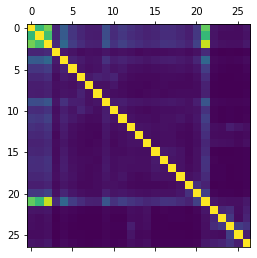

In [4]:
plt.matshow(bacdata[bclibs].corr(method='spearman'))

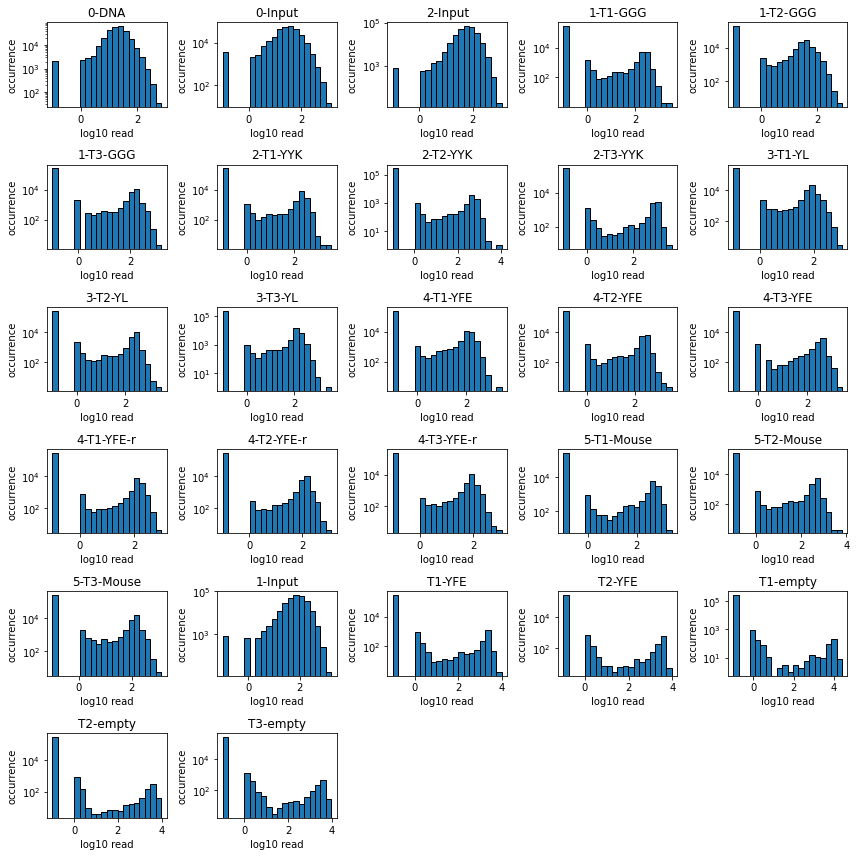

In [5]:
plt.figure(figsize=(12,12))
for ploti,lib in enumerate(bclibs):
    plt.subplot(6,5,ploti+1)
    plt.hist(np.log10(bacdata[lib]+0.1),edgecolor='black',bins=20)
    plt.title(lib)
    plt.yscale('log')
    plt.ylabel('occurrence')
    plt.xlabel('log10 read')
plt.tight_layout()

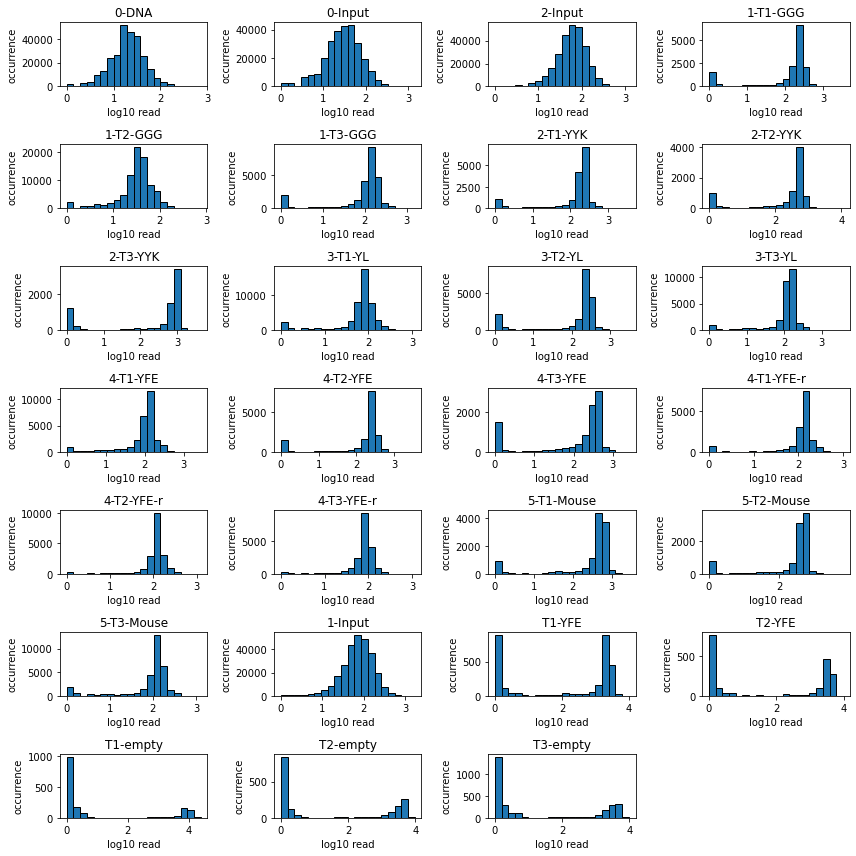

In [8]:
plt.figure(figsize=(12,12))
for ploti,lib in enumerate(bclibs):
    plt.subplot(7,4,ploti+1)
    plt.hist(np.log10(bacdata[lib][bacdata[lib]>0]),edgecolor='black',bins=20)
    plt.title(lib)
    plt.ylabel('occurrence')
    plt.xlabel('log10 read')
plt.tight_layout()
# The distribution look good
# PCR is pretty even, within one log -- maybe output with limited molecules
# Some sample has molecules with low read depth (<10), maybe some unwanted contamination or error 
# -- cutoff >10 or >100 for certain sample


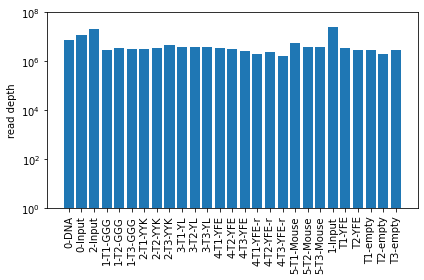

In [7]:
plt.bar(bclibs,bacdata[bclibs].sum(axis=0))
plt.ylabel('read depth')
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylim(1,1e8)
plt.tight_layout()
#depth is high enough

0-DNA 275135
0-Input 273537
2-Input 276405
1-T1-GGG 15075
1-T2-GGG 86106
1-T3-GGG 25250
2-T1-YYK 16320
2-T2-YYK 8374
2-T3-YYK 7620
3-T1-YL 46633
3-T2-YL 19452
3-T3-YL 28278
4-T1-YFE 29489
4-T2-YFE 15204
4-T3-YFE 9721
4-T1-YFE-r 15404
4-T2-YFE-r 19512
4-T3-YFE-r 19528
5-T1-Mouse 12116
5-T2-Mouse 9556
5-T3-Mouse 32422
1-Input 276305
T1-YFE 2857
T2-YFE 1892
T1-empty 1625
T2-empty 1631
T3-empty 2892


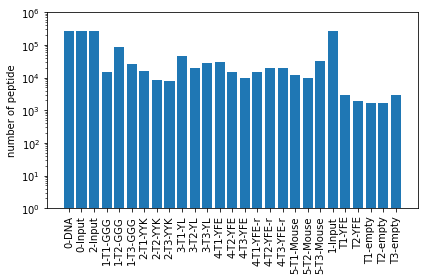

In [15]:
plt.bar(bclibs,bacdata[bclibs].astype(bool).sum(axis=0))
plt.ylabel('number of peptide')
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylim(1,1e6)
plt.tight_layout()
for bclib in bclibs:
    print(bclib,bacdata[bclib].astype(bool).sum(axis=0))

In [16]:
#print(bacdata['T2-empty'][bacdata['T2-empty']>0].astype(bool).sum())
for bclib in bclibs:
    print(bclib,bacdata[bclib][bacdata[bclib]>10].astype(bool).sum(axis=0))

0-DNA 219953
0-Input 235430
2-Input 268014
1-T1-GGG 12953
1-T2-GGG 77407
1-T3-GGG 22191
2-T1-YYK 14576
2-T2-YYK 7094
2-T3-YYK 6024
3-T1-YL 42088
3-T2-YL 16487
3-T3-YL 26334
4-T1-YFE 27104
4-T2-YFE 13292
4-T3-YFE 7966
4-T1-YFE-r 14283
4-T2-YFE-r 18838
4-T3-YFE-r 18694
5-T1-Mouse 10924
5-T2-Mouse 8561
5-T3-Mouse 28719
1-Input 268153
T1-YFE 1752
T2-YFE 955
T1-empty 373
T2-empty 626
T3-empty 974


- please check the above number with the output molecules 

Text(0, 0.5, '4-T3-YFE-r')

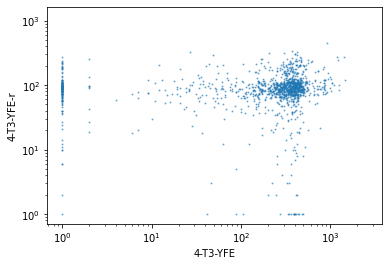

In [9]:
plt.scatter(bacdata['4-T3-YFE'],bacdata['4-T3-YFE-r'],s=1,alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('4-T3-YFE')
plt.ylabel('4-T3-YFE-r')

Text(0, 0.5, '4-T3-YFE-r')

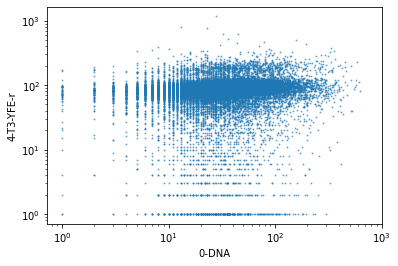

In [10]:
plt.scatter(bacdata['0-DNA'],bacdata['4-T3-YFE-r'],s=1,alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('0-DNA')
plt.ylabel('4-T3-YFE-r')

Text(0, 0.5, '2-Input')

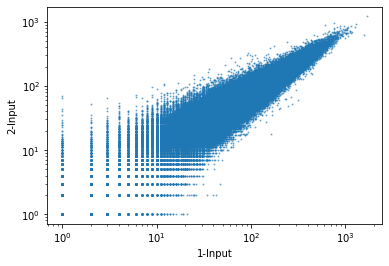

In [11]:
plt.scatter(bacdata['1-Input'],bacdata['2-Input'],s=1,alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.xlabel('1-Input')
plt.ylabel('2-Input')

In [12]:
#let's see correlation first
#Use spearman for input, use odds ratio for the rest (not optimal)
bclibs

['0-DNA',
 '0-Input',
 '2-Input',
 '1-T1-GGG',
 '1-T2-GGG',
 '1-T3-GGG',
 '2-T1-YYK',
 '2-T2-YYK',
 '2-T3-YYK',
 '3-T1-YL',
 '3-T2-YL',
 '3-T3-YL',
 '4-T1-YFE',
 '4-T2-YFE',
 '4-T3-YFE',
 '4-T1-YFE-r',
 '4-T2-YFE-r',
 '4-T3-YFE-r',
 '5-T1-Mouse',
 '5-T2-Mouse',
 '5-T3-Mouse',
 '1-Input',
 'T1-YFE',
 'T2-YFE',
 'T1-empty',
 'T2-empty',
 'T3-empty']

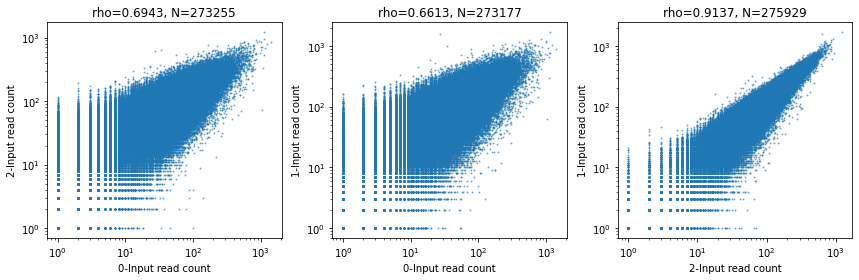

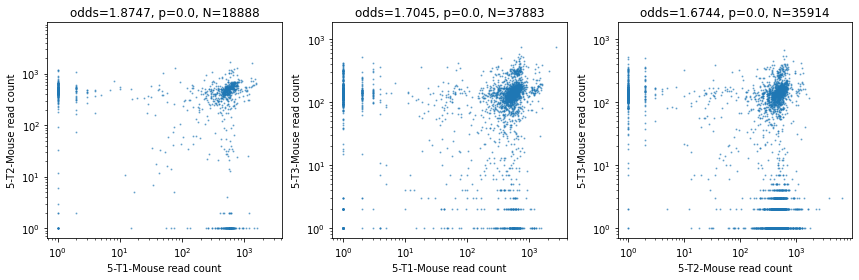

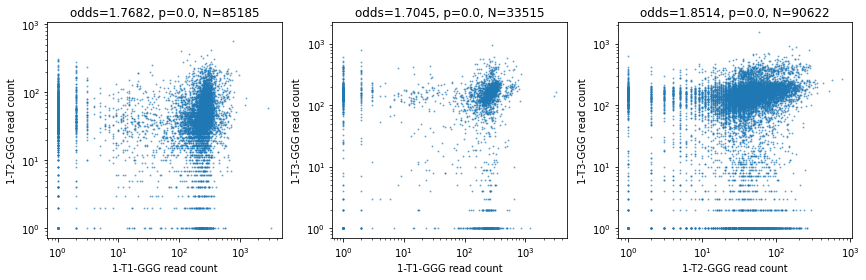

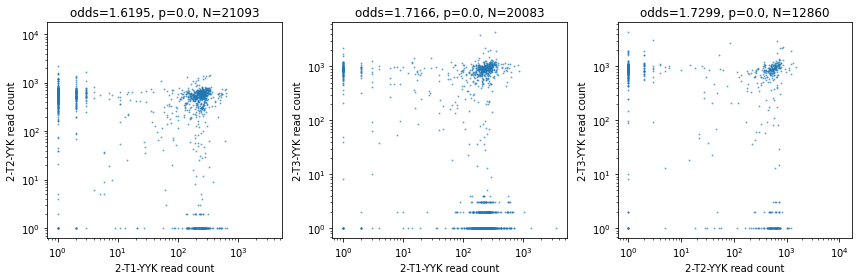

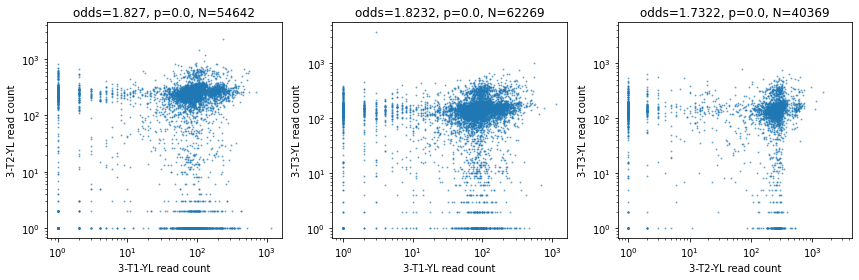

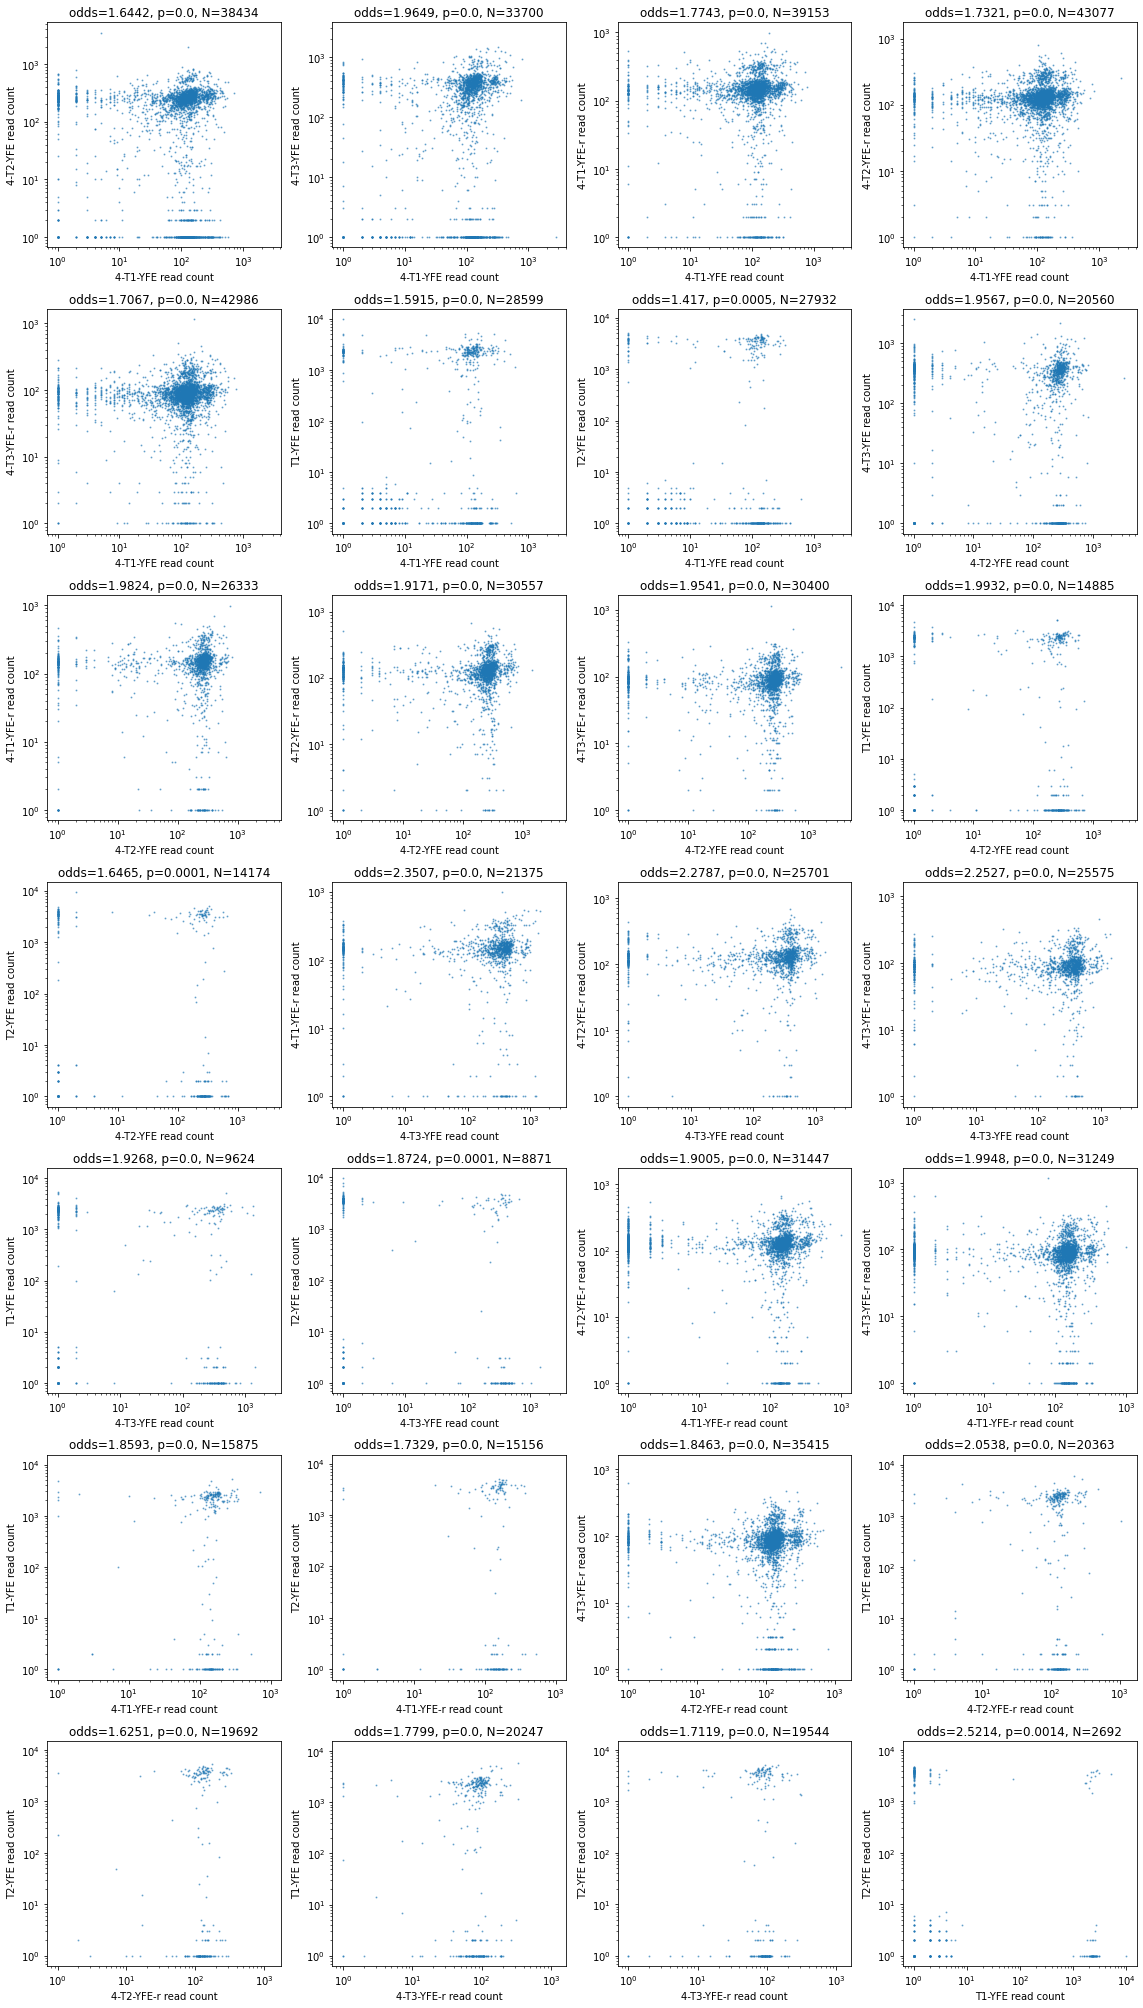

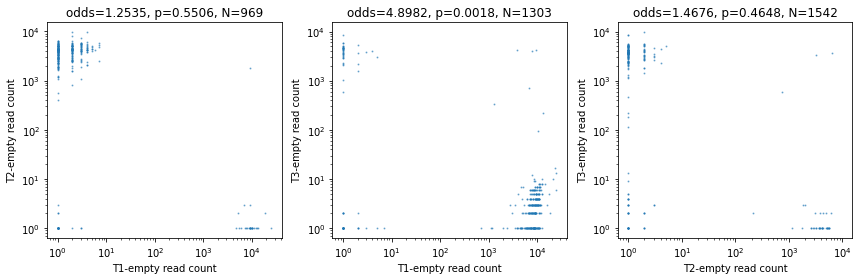

In [13]:
grouplist = ['Input','Mouse','GGG','YYK','YL','YFE','empty']
for group in grouplist:
    tlibs = [x for x in bclibs if group in x]
    Nlib = len(tlibs)
    Nplot = Nlib*(Nlib-1)/2
    plt.figure(figsize=(16,4*math.ceil(Nplot/4)))
    ploti = 0
    for i,lib1 in enumerate(tlibs):
        for j,lib2 in enumerate(tlibs):
            if i>=j: continue
            ploti += 1
            plt.subplot(math.ceil(Nplot/4),4,ploti)
            plt.scatter(bacdata[lib1],bacdata[lib2],s=1,alpha=0.5)
            plt.xlabel(lib1+' read count')
            plt.ylabel(lib2+' read count')
            plt.xscale('log')
            plt.yscale('log')
            if group == 'Input': #spearman correlation test
                tdata = bacdata[(bacdata[lib1]!=0)&(bacdata[lib2]!=0)]
                rho = ss.spearmanr(tdata[lib1],tdata[lib2])[0]
                count = len(tdata)
                plt.title('rho='+str(round(rho,4))+', N='+str(count))
            else: #fisher exact test
                if group == 'empty': 
                    THRE = 100
                else: 
                    THRE = 10
                n1 = len(bacdata[(bacdata[lib1]>THRE)&(bacdata[lib2]>THRE)])
                n2 = len(bacdata[(bacdata[lib1]<=THRE)&(bacdata[lib2]>THRE)])
                n3 = len(bacdata[(bacdata[lib1]>THRE)&(bacdata[lib2]<=THRE)])
                n4 = len(bacdata[(bacdata[lib1]<=THRE)&(bacdata[lib2]<=THRE)])
                odds,p = ss.fisher_exact([[n1,n2],[n3,n4]])
                count = n1+n2+n3
                plt.title('odds='+str(round(odds,4))+', p='+str(round(p,4))+', N='+str(count))
    plt.tight_layout()
    plt.savefig('correlation_scatter_'+group+'.png',dpi=300)

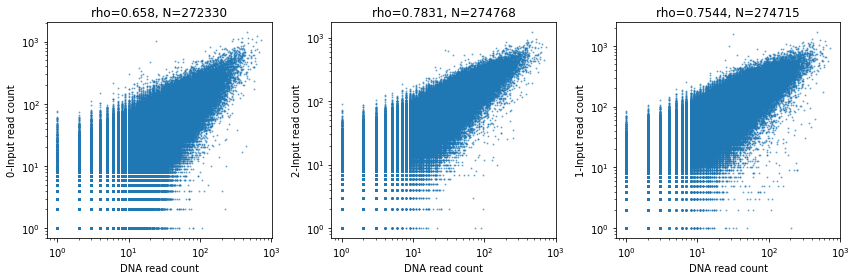

In [14]:
    group = 'Input'
    tlibs = [x for x in bclibs if group in x]
    plt.figure(figsize=(12,4))
    for i,lib in enumerate(tlibs):
            plt.subplot(1,3,i+1)
            plt.scatter(bacdata['0-DNA'],bacdata[lib],s=1,alpha=0.5)
            plt.xlabel('DNA read count')
            plt.ylabel(lib+' read count')
            plt.xscale('log')
            plt.yscale('log')
            tdata = bacdata[(bacdata['0-DNA']!=0)&(bacdata[lib]!=0)]
            rho = ss.spearmanr(tdata['0-DNA'],tdata[lib])[0]
            count = len(tdata)
            plt.title('rho='+str(round(rho,4))+', N='+str(count))
    plt.tight_layout()

# Correlation part
1) 2-Input-0826: 1-GGG;2-YYK;3-YL;4-YFE(-r: PCR-repeated);5-mouse (all of the samples are serum this time, GGG are Name Initials of this patient)
2) 1-Input-0823: YFE; empty
3) 0-Input-0607

- Input:   
1-Input and 2-Input seems really good.  0 is not as good.

- Selection:   
1 No linear correlation among replicates; thus spearman/pearson correlation is not meaningful. 
2 Seems with high bottleneck on selecting limited amout of cDNA molecules for library construction
3 higher odds ratio means more reproducible selection, but not taking the number of positive peptides into account
4 bidning/wash condition is really harsh. Empty beads are really empty.

- maybe something for optimization
1 Check IgG loading efficiency
2 Check In vitro tranlsation efficiency
-- do some WB or ELISA to check tranlsation efficiency? Are we really translating something that is good (not only qPCR control maybe?) -- check on human data to compare with US
-- or instead, use positive control spike in and do qPCR (PrG/PrA/STOP codon/Random with IgG ; or HA/Strep with antibdoy)
-- stop codon no stop is always the issue. FLAG beads pre-blocking? other things? (see below)
3 Use posirive/negative control to optimize wash/selection condition ? 
-- 0823-YFE, selection stronger than 0826. 0826 has better data quality. 0823 is so few
-- we may need to optimize binding (4C O/N or RT 3h) and wash condition to have best sensitivity to distinguish between positive and negative 
-- spike in control do not need to be 1/20W, the selection condition optimization should be the same (as using qPCR, we are comparing to its own initial input amount, probably not to total)


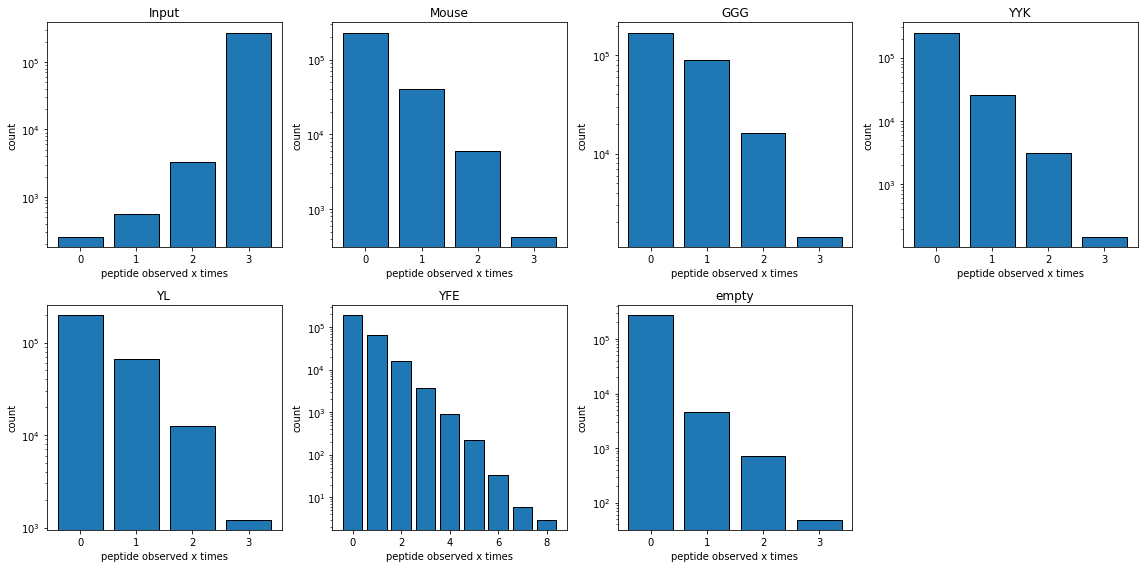

In [15]:
#As output is so limited, seems PCR'ed from 1-2 molecular/kind of peptide, then
#we cannot rank hits according to their frequency(p-value), all double positive are equally confident.
#but we can count how many times a hit appeared, we may still need to exclude some experiments that are not confident enough.
plt.figure(figsize=(16,8))
ploti = 0
for group in grouplist:
    ploti += 1
    plt.subplot(2,4,ploti)
    tlibs = [x for x in bclibs if group in x]
    Nlib = len(tlibs)
    xlist = range(Nlib+1)
    ylist = []
    tdata = bacdata[tlibs]
    pepcount = Counter(np.count_nonzero(tdata, axis=1)) #Count how many samples has this peptide 
    for occ in xlist:
        ylist.append(pepcount[occ])
    plt.bar(xlist,ylist,edgecolor='black')
    plt.ylabel('count')
    plt.xlabel('peptide observed x times')
    plt.yscale('log')
    plt.title(group)
plt.tight_layout()
plt.savefig('peptide_occurrence.png',dpi=300)

# number of peptide observed in empty is lower
# However, not many peptide were observed in all three replicates 


In [16]:
group = 'Input'
tlibs = [x for x in bclibs if group in x]
bacdata[['Gene']+tlibs]

,Gene,0-Input,2-Input,1-Input
0,ID_16444_Peptide_16466_Gene_UniRef90_W8GYQ0,14,19,6
1,ID_38972_Peptide_43852_Gene_11666_A0A3D2XRZ1Ma...,50,34,67
2,ID_143390_Peptide_201906_Gene_190275_A0A4U7JK29,33,38,52
3,ID_230305_Peptide_335404_Gene_4057_A0A6N3B2Q8M...,40,103,121
4,ID_249385_Peptide_396300_Gene_75828_D6BH94,56,137,123
...,...,...,...,...
277146,ID_93678_Peptide_135486_Gene_155888_B0NFN8,0,0,0
277147,ID_93782_Peptide_135629_Gene_155960_B0NI29,0,0,0
277148,ID_95194_Peptide_137308_Gene_156876_A0A6N3CUZ8...,0,0,0
277149,ID_96841_Peptide_139327_Gene_157995_U2BPQ5_160...,1,0,0


['0-DNA']
['0-Input', '2-Input', '1-Input']


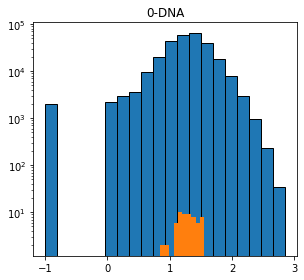

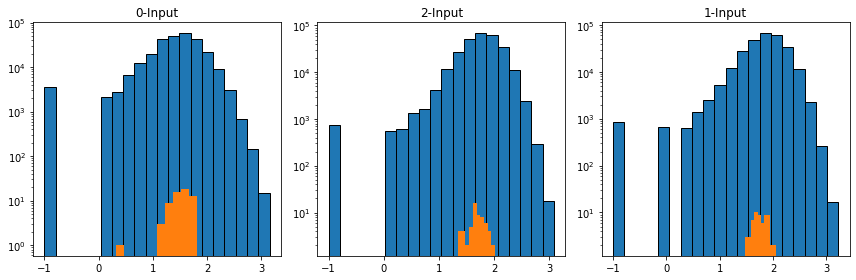

In [19]:
#Stop frequency
group = 'DNA'
tlibs = [x for x in bclibs if group in x]
print (tlibs)
plt.figure(figsize=(12,4))
for i,tlib in enumerate(tlibs):
    plt.subplot(1,3,i+1)
    stopdata = bacdata[bacdata['Gene'].str.contains('STOP')]
    plt.hist(np.log10(bacdata[tlib]+0.1),bins=20,edgecolor='black')
    plt.hist(np.log10(stopdata[tlib]+0.1))
    plt.yscale('log')
    plt.title(tlib)
plt.tight_layout()

group = 'Input'
tlibs = [x for x in bclibs if group in x]
print (tlibs)
plt.figure(figsize=(12,4))
for i,tlib in enumerate(tlibs):
    plt.subplot(1,3,i+1)
    stopdata = bacdata[bacdata['Gene'].str.contains('STOP')]
    plt.hist(np.log10(bacdata[tlib]+0.1),bins=20,edgecolor='black')
    plt.hist(np.log10(stopdata[tlib]+0.1))
    plt.yscale('log')
    plt.title(tlib)
plt.tight_layout()



# No significant reduction of STOP codon 

- Check Condition to block FLAG beads 
- FLAG elution ?
- Still need WB to check in vitro translation product

# Now checking positive and negative control

In [22]:
poslist = pd.read_csv('BacPos.csv',names=['seq','Gene'])
neglist = pd.read_csv('BacNeg.csv',names=['seq','Gene'])
list(neglist)

['seq', 'Gene']

In [23]:
poslist = list(poslist['Gene'])
neglist = list(neglist['Gene'])

In [25]:
bacdata['peptide name']=bacdata['Gene'].apply(lambda x:'_'.join(x.rsplit('_')[2:]))
bacdata[bacdata['peptide name'].isin(neglist)]

,Gene,0-DNA,0-Input,2-Input,1-T1-GGG,1-T2-GGG,1-T3-GGG,2-T1-YYK,2-T2-YYK,2-T3-YYK,...,5-T1-Mouse,5-T2-Mouse,5-T3-Mouse,1-Input,T1-YFE,T2-YFE,T1-empty,T2-empty,T3-empty,peptide name
109,ID_277032_WP_005424737.1_positive_9_Scramble5_...,112,123,289,2924,58,139,0,0,0,...,0,0,176,344,0,0,0,0,0,WP_005424737.1_positive_9_Scramble5_1426
425,ID_276243_WP_000731642.1_positive_5_Scramble2_634,42,50,128,861,206,325,260,0,573,...,1211,0,162,153,1,0,11140,0,4,WP_000731642.1_positive_5_Scramble2_634
434,ID_276655_WP_014550853.1_positive_11_Scramble4...,47,36,68,280,0,0,212,0,0,...,0,0,0,109,0,0,0,0,0,WP_014550853.1_positive_11_Scramble4_1047
1162,ID_276907_WP_014550853.1_positive_5_Scramble5_...,33,45,90,232,34,0,0,0,0,...,0,0,0,94,0,0,0,0,0,WP_014550853.1_positive_5_Scramble5_1300
1196,ID_276204_CIV81757.1_positive_3_Scramble2_595,11,37,32,230,0,0,0,0,0,...,0,0,0,29,0,0,0,0,0,CIV81757.1_positive_3_Scramble2_595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277095,ID_276011_YP_001129471.1_positive_2_Scramble1_401,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YP_001129471.1_positive_2_Scramble1_401
277096,ID_276269_YP_001129471.1_positive_2_Scramble2_660,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YP_001129471.1_positive_2_Scramble2_660
277097,ID_276785_YP_001129471.1_positive_2_Scramble4_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YP_001129471.1_positive_2_Scramble4_1178
277098,ID_277043_YP_001129471.1_positive_2_Scramble5_...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,YP_001129471.1_positive_2_Scramble5_1437


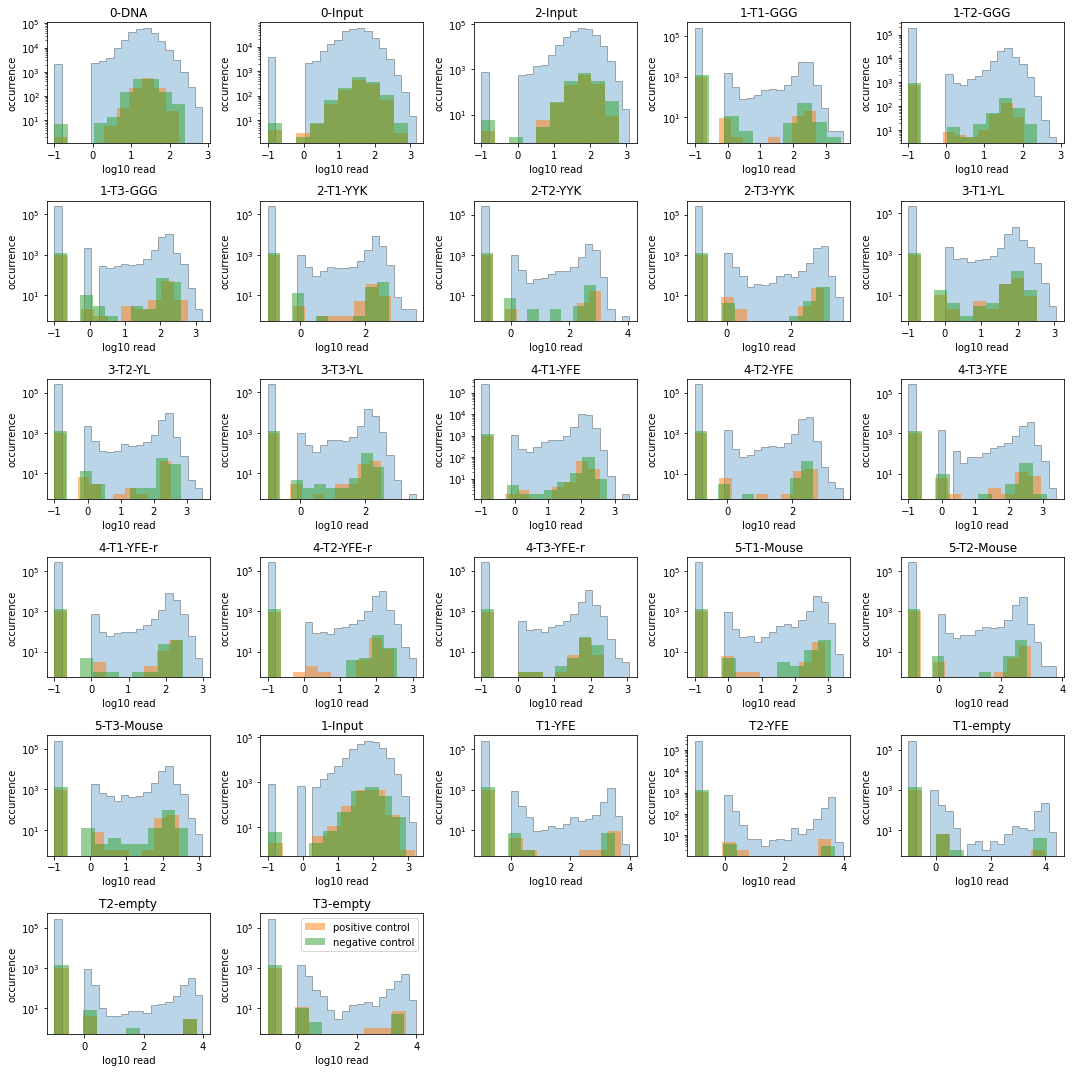

In [26]:
plt.figure(figsize=(15,15))
for ploti,lib in enumerate(bclibs):
    plt.subplot(6,5,ploti+1)
    plt.hist(np.log10(bacdata[lib]+0.1),edgecolor='black',bins=20,histtype='stepfilled',alpha=0.3)
    plt.hist(np.log10(bacdata[bacdata['peptide name'].isin(poslist)][lib]+0.1),label='positive control',alpha=0.5)
    plt.hist(np.log10(bacdata[bacdata['peptide name'].isin(neglist)][lib]+0.1),label='negative control',alpha=0.5)
    plt.title(lib)
    plt.yscale('log')
    plt.ylabel('occurrence')
    plt.xlabel('log10 read')
plt.legend()
plt.tight_layout()

#No significant distribution difference between positive and negative control

In [31]:
#Try to calculate enrichment
#As Input 1 and 2 are good, use the average of them as input frequency

for i in range(3):
    bacdata[str(i)+'-Input_freq'] = bacdata[str(i)+'-Input']/sum(bacdata[str(i)+'-Input'])
#    bacdata['Input_meanfreq'] = (bacdata['0-Input_freq']+bacdata['1-Input_freq']+bacdata['2-Input_freq'])/3
    bacdata['Input_meanfreq'] = (bacdata['1-Input_freq']+bacdata['2-Input_freq'])/2
grouplist = ['Input','Mouse','GGG','YYK','YL','YFE','empty']
for group in grouplist[1:]:
    tlibs = [x for x in bclibs if group in x]
    for lib in tlibs:
        bacdata[lib+'_enrich'] = (bacdata[lib]/sum(bacdata[lib]))/bacdata['Input_meanfreq']

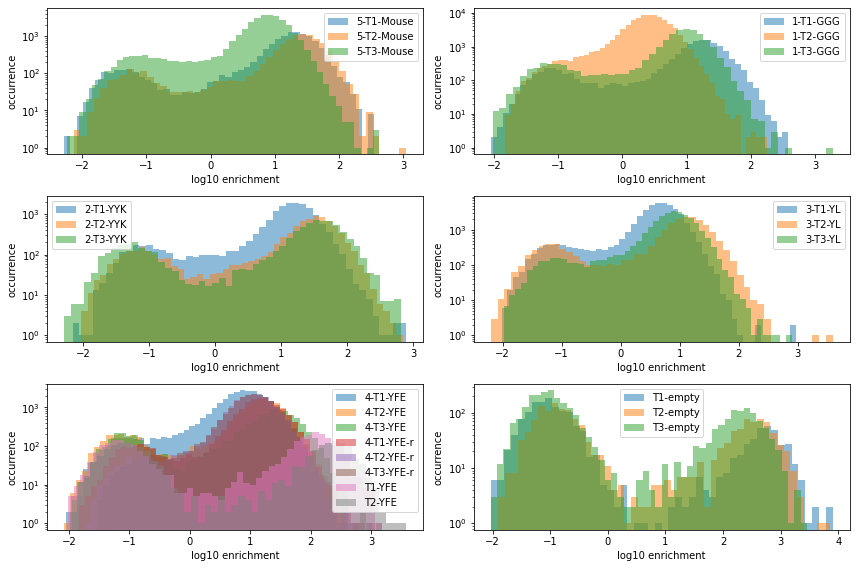

In [35]:
plt.figure(figsize=(12,8))
ploti = 0
for group in grouplist[1:]:
    ploti += 1
    plt.subplot(3,2,ploti)
    tlibs = [x for x in bclibs if group in x]
    for lib in tlibs:
        tlist = bacdata[lib+'_enrich'][~bacdata[lib+'_enrich'].isin([np.nan, np.inf, -np.inf,0])]
 #       plt.hist(np.log10(tlist),alpha=0.5,label=lib,bins=20,histtype='step',linewidth=3)
        plt.hist(np.log10(tlist),alpha=0.5,label=lib,bins=50)
    plt.yscale('log')
    plt.legend()
    plt.xlabel('log10 enrichment')
    plt.ylabel('occurrence')
plt.tight_layout()

In [38]:
# Replace enrichment=0 with 0.001 for calculation
def mean_enrich(x):
    tlist = x[[i+'_enrich' for i in tlibs]]
    tlist = tlist[~tlist.isin([np.nan,np.inf])]
    tlist = tlist.replace(0,1e-3)
    if len(tlist) == 0:
        return np.nan
    else:
        return ss.gmean(tlist.astype('float64')) 
    #Use geometric mean, it gives a good and accurate approximation when there is much variation in the data.

for group in grouplist[1:]:
    tlibs = [x for x in bclibs if group in x]
    tdata = bacdata[tlibs]
    bacdata[group+'_count'] = np.count_nonzero(tdata, axis=1)
    bacdata[group+'_meanenrich'] = bacdata.apply(lambda x:mean_enrich(x),axis=1)

In [43]:
def max_enrich(x):
    tlist = x[[i+'_enrich' for i in tlibs]]
    tlist = tlist[~tlist.isin([np.nan,np.inf])]
    tlist = tlist.replace(0,1e-3)
    if len(tlist) == 0:
        return np.nan
    else:
        return max(tlist.astype('float64')) 
    
for group in grouplist[1:]:
    tlibs = [x for x in bclibs if group in x]
    tdata = bacdata[tlibs]
    bacdata[group+'_maxenrich'] = bacdata.apply(lambda x:max_enrich(x),axis=1)

Mouse Counter({0: 229900, 1: 40831, 2: 5997, 3: 423})
GGG Counter({0: 169805, 1: 89686, 2: 16235, 3: 1425})
YYK Counter({0: 248201, 1: 25733, 2: 3070, 3: 147})
YL Counter({0: 197722, 1: 65715, 2: 12494, 3: 1220})
YFE Counter({0: 190733, 1: 65525, 2: 16085, 3: 3635, 4: 913, 5: 217, 6: 34, 7: 6, 8: 3})
empty Counter({0: 271831, 1: 4541, 2: 730, 3: 49})


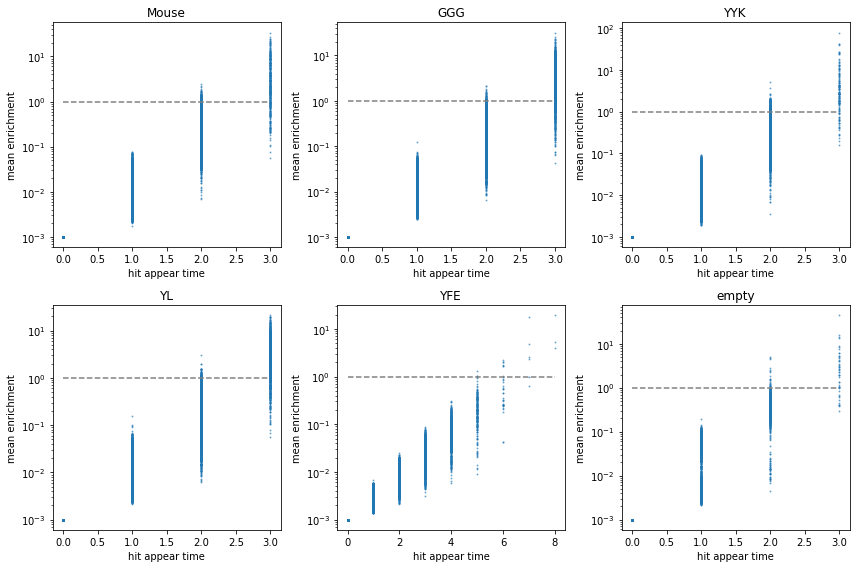

In [46]:
plt.figure(figsize=(12,8))
ploti = 0
for group in grouplist[1:]:
    ploti += 1
    plt.subplot(2,3,ploti)
    plt.scatter(bacdata[group+'_count'],bacdata[group+'_meanenrich'],s=1,alpha=0.5)
    print(group,Counter(bacdata[group+'_count']))
    plt.hlines(y=1,xmin=0,xmax=max(bacdata[group+'_count']),linestyle='--',color='grey') #enrichment>1
    plt.xlabel('hit appear time')
    plt.ylabel('mean enrichment')
    plt.yscale('log')
    plt.title(group)
plt.tight_layout()


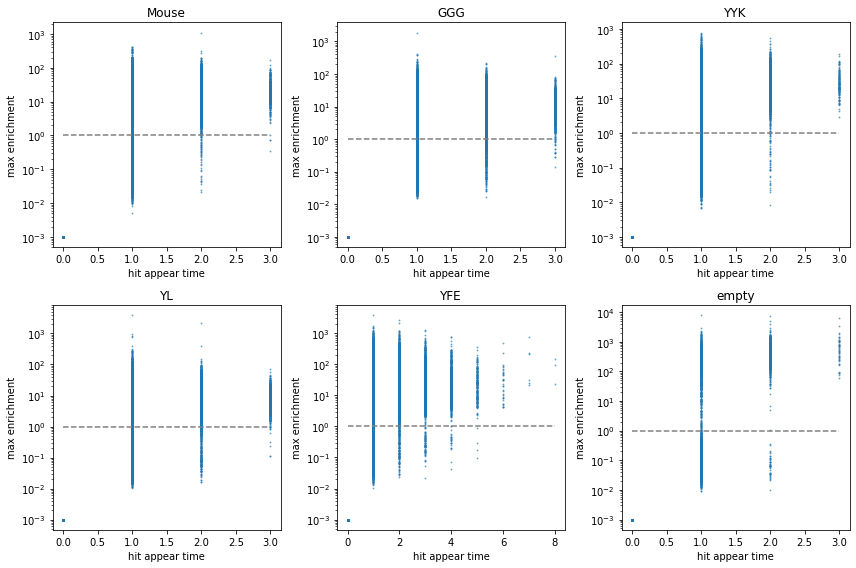

In [44]:
plt.figure(figsize=(12,8))
ploti = 0
for group in grouplist[1:]:
    ploti += 1
    plt.subplot(2,3,ploti)
    plt.scatter(bacdata[group+'_count'],bacdata[group+'_maxenrich'],s=1,alpha=0.5)
    plt.hlines(y=1,xmin=0,xmax=max(bacdata[group+'_count']),linestyle='--',color='grey') #enrichment>1
    plt.xlabel('hit appear time')
    plt.ylabel('max enrichment')
    plt.yscale('log')
    plt.title(group)
plt.tight_layout()

In [47]:
def type_control(x):
    if x in poslist:
        return 'positive control'
    if x in neglist:
        return 'negative control'
    return 'sample'

bacdata['control'] = bacdata['peptide name'].apply(lambda x:type_control(x))

In [57]:
bacPos=bacdata[bacdata['control']=='positive control']
bacNeg=bacdata[bacdata['control']=='negative control']
bacNeg

,Gene,0-DNA,0-Input,2-Input,1-T1-GGG,1-T2-GGG,1-T3-GGG,2-T1-YYK,2-T2-YYK,2-T3-YYK,...,YFE_meanenrich,empty_count,empty_meanenrich,Mouse_maxenrich,GGG_maxenrich,YYK_maxenrich,YL_maxenrich,YFE_maxenrich,empty_maxenrich,control
109,ID_277032_WP_005424737.1_positive_9_Scramble5_...,112,123,289,2924,58,139,0,0,0,...,0.008184,0,0.001000,3.396116,73.968070,0.001000,4.402999,7.634523,0.001000,negative control
425,ID_276243_WP_000731642.1_positive_5_Scramble2_634,42,50,128,861,206,325,260,0,573,...,2.357524,2,0.529442,37.083790,49.075835,19.834710,2.825951,24.589674,659.194092,negative control
434,ID_276655_WP_014550853.1_positive_11_Scramble4...,47,36,68,280,0,0,212,0,0,...,0.003186,0,0.001000,0.001000,25.744608,18.636374,0.001000,10.608302,0.001000,negative control
1162,ID_276907_WP_014550853.1_positive_5_Scramble5_...,33,45,90,232,34,0,0,0,0,...,0.001000,0,0.001000,0.001000,20.045326,0.001000,0.001000,0.001000,0.001000,negative control
1196,ID_276204_CIV81757.1_positive_3_Scramble2_595,11,37,32,230,0,0,0,0,0,...,0.001000,0,0.001000,0.001000,59.478728,0.001000,0.001000,0.001000,0.001000,negative control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277095,ID_276011_YP_001129471.1_positive_2_Scramble1_401,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative control
277096,ID_276269_YP_001129471.1_positive_2_Scramble2_660,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative control
277097,ID_276785_YP_001129471.1_positive_2_Scramble4_...,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative control
277098,ID_277043_YP_001129471.1_positive_2_Scramble5_...,0,0,0,0,0,0,0,0,0,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,negative control


Mouse Counter({0: 884, 1: 131, 2: 17, 3: 2})
GGG Counter({0: 710, 1: 289, 2: 33, 3: 2})
YYK Counter({0: 935, 1: 81, 2: 18})
YL Counter({0: 797, 1: 207, 2: 29, 3: 1})
YFE Counter({0: 733, 1: 227, 2: 61, 3: 10, 8: 1, 5: 1, 4: 1})
empty Counter({0: 1005, 1: 26, 3: 3})


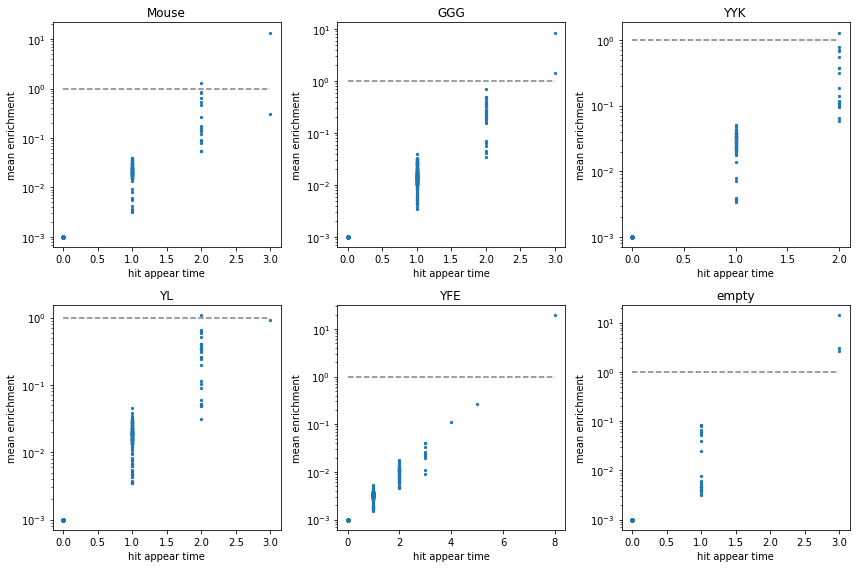

In [54]:
plt.figure(figsize=(12,8))
ploti = 0
for group in grouplist[1:]:
    ploti += 1
    plt.subplot(2,3,ploti)
    plt.scatter(bacPos[group+'_count'],bacPos[group+'_meanenrich'],s=5,alpha=1)
    print(group,Counter(bacPos[group+'_count']))
    plt.hlines(y=1,xmin=0,xmax=max(bacPos[group+'_count']),linestyle='--',color='grey') #enrichment>1
    plt.xlabel('hit appear time')
    plt.ylabel('mean enrichment')
    plt.yscale('log')
    plt.title(group)
plt.tight_layout()



Mouse Counter({0: 1143, 1: 182, 2: 34, 3: 2})
GGG Counter({0: 830, 1: 433, 2: 91, 3: 7})
YYK Counter({0: 1205, 1: 143, 2: 13})
YL Counter({0: 959, 1: 330, 2: 64, 3: 8})
YFE Counter({0: 953, 1: 327, 2: 60, 3: 12, 4: 6, 5: 2, 7: 1})
empty Counter({0: 1327, 1: 28, 2: 6})


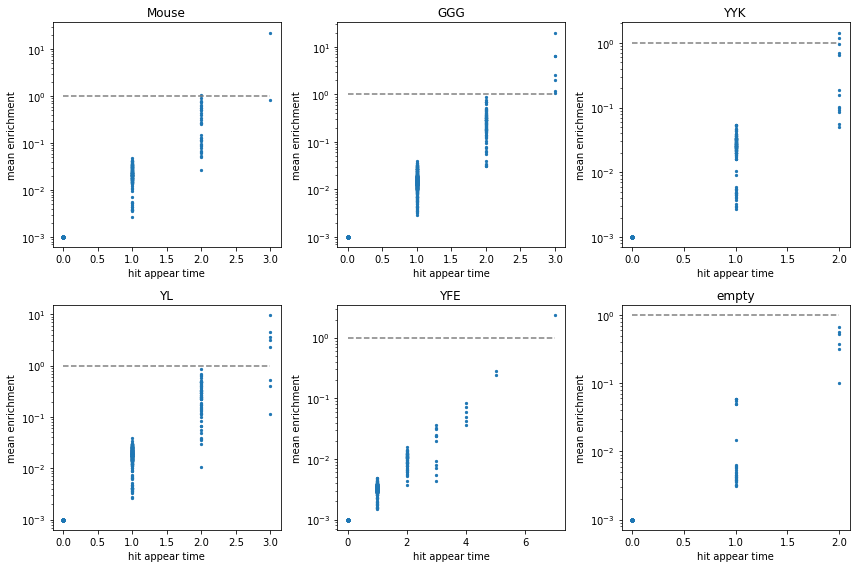

In [58]:
plt.figure(figsize=(12,8))
ploti = 0
for group in grouplist[1:]:
    ploti += 1
    plt.subplot(2,3,ploti)
    plt.scatter(bacNeg[group+'_count'],bacNeg[group+'_meanenrich'],s=5,alpha=1)
    print(group,Counter(bacNeg[group+'_count']))
    plt.hlines(y=1,xmin=0,xmax=max(bacNeg[group+'_count']),linestyle='--',color='grey') #enrichment>1
    plt.xlabel('hit appear time')
    plt.ylabel('mean enrichment')
    plt.yscale('log')
    plt.title(group)
plt.tight_layout()

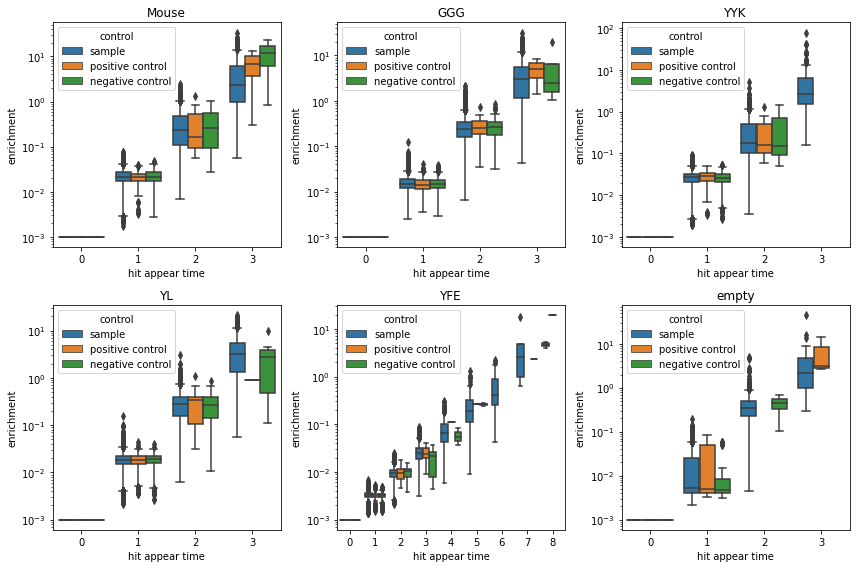

In [59]:
plt.figure(figsize=(12,8))
ploti = 0
for group in grouplist[1:]:
    ploti += 1
    plt.subplot(2,3,ploti)
    sns.boxplot(x=bacdata[group+'_count'],y=bacdata[group+'_meanenrich'],hue=bacdata['control'])
    plt.xlabel('hit appear time')
    plt.ylabel('enrichment')
    plt.yscale('log')
    plt.title(group)
plt.tight_layout()

In [60]:
def test_enrich(x):
    x = x[~x.isin([np.nan,np.inf,0])] #note 0 are excluded for t test.
    if len(x) <= 1: 
        return np.nan
    else:
        return ss.ttest_1samp(x,1)[1]
    
for group in grouplist[1:]:
    tlibs = [x for x in bclibs if group in x]
    tdata = bacdata[tlibs]
    bacdata[group+'_p_1samplet'] = tdata.apply(lambda x:test_enrich(x),axis=1) 

In [36]:
bacdata

,Gene,0-DNA,0-Input,2-Input,1-T1-GGG,1-T2-GGG,1-T3-GGG,2-T1-YYK,2-T2-YYK,2-T3-YYK,...,YFE_count,YFE_meanenrich,empty_count,empty_meanenrich,Mouse_p_1samplet,GGG_p_1samplet,YYK_p_1samplet,YL_p_1samplet,YFE_p_1samplet,empty_p_1samplet
0,ID_16444_Peptide_16466_Gene_UniRef90_W8GYQ0,11,14,19,211,0,1,0,0,0,...,0,0.001,0,0.001,NaN,0.500000,NaN,NaN,NaN,NaN
1,ID_38972_Peptide_43852_Gene_11666_A0A3D2XRZ1Ma...,21,50,34,277,0,0,0,0,0,...,0,0.001,0,0.001,NaN,NaN,NaN,NaN,NaN,NaN
2,ID_143390_Peptide_201906_Gene_190275_A0A4U7JK29,11,33,38,203,22,0,0,0,0,...,0,0.001,0,0.001,NaN,0.434054,NaN,NaN,NaN,NaN
3,ID_230305_Peptide_335404_Gene_4057_A0A6N3B2Q8M...,34,40,103,275,0,0,0,0,0,...,0,0.001,0,0.001,NaN,NaN,NaN,NaN,NaN,NaN
4,ID_249385_Peptide_396300_Gene_75828_D6BH94,32,56,137,278,0,0,0,0,0,...,0,0.001,0,0.001,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277146,ID_93678_Peptide_135486_Gene_155888_B0NFN8,2,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277147,ID_93782_Peptide_135629_Gene_155960_B0NI29,1,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277148,ID_95194_Peptide_137308_Gene_156876_A0A6N3CUZ8...,1,0,0,0,0,0,0,0,0,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
277149,ID_96841_Peptide_139327_Gene_157995_U2BPQ5_160...,0,1,0,0,0,0,0,0,0,...,0,0.001,0,0.001,NaN,NaN,NaN,NaN,NaN,NaN


/Users/yushendu/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


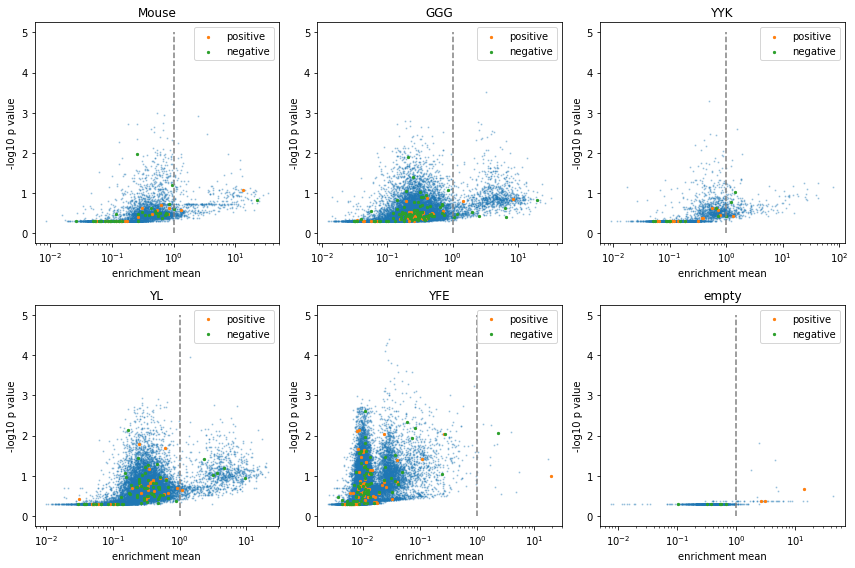

In [61]:
plt.figure(figsize=(12,8))
ploti = 0
for group in grouplist[1:]:
    ploti += 1
    plt.subplot(2,3,ploti)
    tdata = bacdata[bacdata[group+'_count']>1]
    plt.scatter(tdata[group+'_meanenrich'],-np.log10(tdata[group+'_p_1samplet']),s=1,alpha=0.3)
    tdata = bacdata[(bacdata[group+'_count']>1)&(bacdata['control']=='positive control')]
    plt.scatter(tdata[group+'_meanenrich'],-np.log10(tdata[group+'_p_1samplet']),s=5,alpha=1,label='positive')
    tdata = bacdata[(bacdata[group+'_count']>1)&(bacdata['control']=='negative control')]
    plt.scatter(tdata[group+'_meanenrich'],-np.log10(tdata[group+'_p_1samplet']),s=5,alpha=1,label='negative')
    plt.xlabel('enrichment mean')
    plt.ylabel('-log10 p value')
    plt.xscale('log')
    plt.title(group)
    plt.vlines(x=1,ymin=0,ymax=5,linestyle='--',color='grey')
    plt.legend()
plt.tight_layout()

In [62]:
bacdata.to_csv('Bac_enrichment.csv')

In [64]:
pd.set_option('max_columns', None)
bacdata[bacdata['GGG_count']>2].sort_values(by='GGG_p_1samplet')

,Gene,0-DNA,0-Input,2-Input,1-T1-GGG,1-T2-GGG,1-T3-GGG,2-T1-YYK,2-T2-YYK,2-T3-YYK,3-T1-YL,3-T2-YL,3-T3-YL,4-T1-YFE,4-T2-YFE,4-T3-YFE,4-T1-YFE-r,4-T2-YFE-r,4-T3-YFE-r,5-T1-Mouse,5-T2-Mouse,5-T3-Mouse,1-Input,T1-YFE,T2-YFE,T1-empty,T2-empty,T3-empty,peptide name,0-Input_freq,1-Input_freq,2-Input_freq,Input_meanfreq,5-T1-Mouse_enrich,5-T2-Mouse_enrich,5-T3-Mouse_enrich,1-T1-GGG_enrich,1-T2-GGG_enrich,1-T3-GGG_enrich,2-T1-YYK_enrich,2-T2-YYK_enrich,2-T3-YYK_enrich,3-T1-YL_enrich,3-T2-YL_enrich,3-T3-YL_enrich,4-T1-YFE_enrich,4-T2-YFE_enrich,4-T3-YFE_enrich,4-T1-YFE-r_enrich,4-T2-YFE-r_enrich,4-T3-YFE-r_enrich,T1-YFE_enrich,T2-YFE_enrich,T1-empty_enrich,T2-empty_enrich,T3-empty_enrich,Mouse_count,Mouse_meanenrich,GGG_count,GGG_meanenrich,YYK_count,YYK_meanenrich,YL_count,YL_meanenrich,YFE_count,YFE_meanenrich,empty_count,empty_meanenrich,Mouse_maxenrich,GGG_maxenrich,YYK_maxenrich,YL_maxenrich,YFE_maxenrich,empty_maxenrich,control,Mouse_p_1samplet,GGG_p_1samplet,YYK_p_1samplet,YL_p_1samplet,YFE_p_1samplet,empty_p_1samplet
3697,ID_147507_Peptide_210578_Gene_193433_S0FJ56,140,125,414,200,205,193,0,0,0,192,0,0,0,0,0,1,0,232,0,542,1,469,0,0,0,0,0,Peptide_210578_Gene_193433_S0FJ56,1.038239e-05,1.801953e-05,0.000020,1.892655e-05,0.000000,7.728695,0.013795,3.617065,3.064511,3.138127,0.000000,0.000000,0.0,2.639208,0.000000,0.000000,0.000000,0.000000,0.0,0.025625,0.0000,7.300536,0.0,0.00000,0.0,0.0,0.000000,2,0.047418,3,3.264345,0,0.001000,1,0.013819,2,0.004560,0,0.001000,7.728695,3.617065,0.001000,2.639208,7.300536,0.001000,sample,0.500000,0.000308,NaN,NaN,0.500000,NaN
11237,ID_70834_Peptide_98108_Gene_13806_A0A1G4VVM5Ma...,141,329,411,126,145,137,0,0,0,227,0,288,0,0,0,0,0,0,1,0,0,385,0,0,0,0,0,Peptide_98108_Gene_13806_A0A1G4VVM5MatureChain,2.732645e-05,1.479215e-05,0.000020,1.724100e-05,0.010666,0.000000,0.000000,2.501531,2.379493,2.445360,0.000000,0.000000,0.0,3.425369,0.000000,4.499738,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.00000,0.0,0.0,0.000000,1,0.002201,3,2.441618,0,0.001000,2,0.248866,0,0.001000,0,0.001000,0.010666,2.501531,0.001000,4.499738,0.001000,0.001000,sample,NaN,0.001660,NaN,0.075346,NaN,NaN
1610,ID_231559_Peptide_338901_Gene_423_A0A1R3FRW0Ma...,623,764,600,231,223,257,162,0,0,67,0,77,0,0,0,0,0,0,221,0,88,648,0,2337,0,0,784,Peptide_338901_Gene_423_A0A1R3FRW0MatureChain,6.345716e-05,2.489692e-05,0.000029,2.682061e-05,1.515293,0.000000,0.856672,2.948092,2.352421,2.948826,1.976703,0.000000,0.0,0.649905,0.000000,0.773356,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,29.77317,0.0,0.0,9.880146,2,0.109086,3,2.734650,1,0.012550,2,0.079508,1,0.003624,1,0.021458,1.515293,2.948826,1.976703,0.773356,29.773170,9.880146,sample,0.260261,0.001886,NaN,0.044758,NaN,NaN
7173,ID_699_Peptide_207_Gene_UniRef90_A0A095S5E2,185,165,293,142,129,119,0,0,0,0,0,0,0,216,0,0,119,0,0,0,0,446,0,0,0,0,0,Peptide_207_Gene_UniRef90_A0A095S5E2,1.370475e-05,1.713585e-05,0.000014,1.558632e-05,0.000000,0.000000,0.000000,3.118476,2.341666,2.349568,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,4.223804,0.0,0.000000,3.1686,0.000000,0.0,0.00000,0.0,0.0,0.000000,0,0.001000,3,2.579200,0,0.001000,0,0.001000,2,0.007777,0,0.001000,0.001000,3.118476,0.001000,0.001000,4.223804,0.001000,sample,NaN,0.002654,NaN,NaN,0.180449,NaN
12345,ID_164599_Peptide_230659_Gene_200228_A0A1G4PIT6,66,244,200,99,84,86,0,0,0,92,0,47,0,0,0,0,0,0,0,0,61,114,0,0,0,0,0,Peptide_230659_Gene_200228_A0A1G4PIT6,2.026642e-05,4.380014e-06,0.000010,6.980723e-06,0.000000,0.000000,2.281551,4.854366,3.404534,3.791253,0.000000,0.000000,0.0,3.428714,0.000000,1.813655,0.000000,0.000000,0.0,0.000000,0.0000,0.000000,0.0,0.00000,0.0,0.0,0.000000,1,0.013165,3,3.971833,0,0.001000,2,0.183892,0,0.001000,0,0.001000,2.281551,4.854366,0.001000,3.428714,0.001000,0.001000,sample,NaN,0.002801,NaN,0.202041,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [66]:
bacdata[bacdata['YYK_count']>2].sort_values(by='YYK_p_1samplet')

,Gene,0-DNA,0-Input,2-Input,1-T1-GGG,1-T2-GGG,1-T3-GGG,2-T1-YYK,2-T2-YYK,2-T3-YYK,3-T1-YL,3-T2-YL,3-T3-YL,4-T1-YFE,4-T2-YFE,4-T3-YFE,4-T1-YFE-r,4-T2-YFE-r,4-T3-YFE-r,5-T1-Mouse,5-T2-Mouse,5-T3-Mouse,1-Input,T1-YFE,T2-YFE,T1-empty,T2-empty,T3-empty,peptide name,0-Input_freq,1-Input_freq,2-Input_freq,Input_meanfreq,5-T1-Mouse_enrich,5-T2-Mouse_enrich,5-T3-Mouse_enrich,1-T1-GGG_enrich,1-T2-GGG_enrich,1-T3-GGG_enrich,2-T1-YYK_enrich,2-T2-YYK_enrich,2-T3-YYK_enrich,3-T1-YL_enrich,3-T2-YL_enrich,3-T3-YL_enrich,4-T1-YFE_enrich,4-T2-YFE_enrich,4-T3-YFE_enrich,4-T1-YFE-r_enrich,4-T2-YFE-r_enrich,4-T3-YFE-r_enrich,T1-YFE_enrich,T2-YFE_enrich,T1-empty_enrich,T2-empty_enrich,T3-empty_enrich,Mouse_count,Mouse_meanenrich,GGG_count,GGG_meanenrich,YYK_count,YYK_meanenrich,YL_count,YL_meanenrich,YFE_count,YFE_meanenrich,empty_count,empty_meanenrich,Mouse_maxenrich,GGG_maxenrich,YYK_maxenrich,YL_maxenrich,YFE_maxenrich,empty_maxenrich,control,Mouse_p_1samplet,GGG_p_1samplet,YYK_p_1samplet,YL_p_1samplet,YFE_p_1samplet,empty_p_1samplet
73809,ID_266186_Peptide_428140_Gene_91964_A0A3E2US46,370,523,347,0,26,119,99,173,92,92,0,0,0,112,214,0,0,0,0,0,209,451,0,0,0,0,2944,Peptide_428140_Gene_91964_A0A3E2US46,4.343991e-05,1.732795e-05,0.000017,0.000017,0.0,0.000000,3.214511,0.000000,0.433331,2.157246,1.908526,2.951481,1.126575,1.409937,0.000000,0.0,0.000000,2.010850,4.892117,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,58.616756,1,0.014758,2,0.097778,3,1.851397,1,0.011213,2,0.007484,1,0.038845,3.214511,2.157246,2.951481,1.409937,4.892117,58.616756,sample,NaN,0.367088,0.043375,NaN,0.194164,NaN
115022,ID_50928_Peptide_68435_Gene_128912_A0A134C3T2,13,58,44,0,0,0,203,480,508,0,0,0,0,0,0,0,130,4,0,0,0,67,0,0,0,0,0,Peptide_68435_Gene_128912_A0A134C3T2,4.817428e-06,2.574219e-06,0.000002,0.000002,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,28.377699,59.381798,45.108070,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,23.045895,1.017617,0.000000,0.0,0.000000,0.0,0.000000,0,0.001000,0,0.001000,3,42.360550,0,0.001000,2,0.008342,0,0.001000,0.001000,0.001000,59.381798,0.001000,23.045895,0.001000,sample,NaN,NaN,0.055440,NaN,0.485198,NaN
18981,ID_104998_Peptide_150726_Gene_165139_H7C707,64,152,103,0,34,1,272,663,444,99,0,0,124,0,0,0,0,0,0,0,161,125,0,0,0,0,0,Peptide_150726_Gene_165139_H7C707,1.262498e-05,4.802647e-06,0.000005,0.000005,0.0,0.000000,8.634309,0.000000,1.975872,0.063210,18.283736,39.440328,18.957820,5.290298,0.000000,0.0,7.288849,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1,0.020515,2,0.049986,3,23.911012,1,0.017424,1,0.003040,0,0.001000,8.634309,1.975872,39.440328,5.290298,7.288849,0.001000,sample,NaN,0.500000,0.055806,NaN,NaN,NaN
110298,ID_24884_Peptide_9036_Gene_102503_A0A3E5A7N1_1...,108,127,180,0,0,0,249,489,702,66,0,0,113,0,0,0,141,0,0,0,0,189,0,0,1,0,0,Peptide_9036_Gene_102503_A0A3E5A7N1_103518_A0A...,1.054851e-05,7.261603e-06,0.000009,0.000008,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,10.259828,17.831199,18.373303,2.161890,0.000000,0.0,4.071556,0.000000,0.000000,0.0,7.367649,0.000000,0.000000,0.0,0.044741,0.0,0.000000,0,0.001000,0,0.001000,3,14.979683,1,0.012930,2,0.008603,1,0.003550,0.001000,0.001000,18.373303,2.161890,7.367649,0.044741,sample,NaN,NaN,0.067187,NaN,0.070447,NaN
38633,ID_131451_Peptide_186065_Gene_182776_A0A5F0M8R5,389,623,508,0,121,0,261,489,730,119,0,0,0,202,0,0,0,0,0,0,131,468,0,0,0,0,0,Peptide_186065_Gene_182776_A0A5F0M8R5,5.174582e-05,1.798111e-05,0.000024,0.000021,0.0,0.000000,1.616506,0.000000,1.617967,0.000000,4.036834,6.693299,7.171874,1.463175,0.000000,0.0,0.000000,2.909715,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,1,0.011736,1,0.011740,3,5.786792,1,0.011353,1,0.002710,0,0.001000,1.616506,1.617967,7.171874,1.463175,2.909715,0.001000,sample,NaN,NaN,0.068015,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

# positive and negative analysis

1. seems not seperating very well- still thinking either tranlsation or selection issue
2. BUT ! Top hits from each sample seems to be really enriched.
3. Occur in multiple sample is important. 

### Human data

In [88]:
ptdata = pd.read_csv('Huma-QUER_AKT3_20221015.csv',index_col=0,header=0)
ptdata

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,Input-US,T1-QUER-US,T2-QUER-US,T1-empty-US,T2-empty-US
0,CRBA4_HUMAN-25376,4,0,0,0,0,0,0,0,0,0,0,0,0,0
1,FANK1_HUMAN-41277,43,0,0,38,0,0,0,0,0,27,0,0,0,0
2,FANK1_HUMAN-41276,47,0,0,25,31,0,17,0,0,54,0,0,0,0
3,FANK1_HUMAN-41279,33,0,0,0,0,0,0,0,0,40,0,0,1,0
4,FANK1_HUMAN-41278,38,0,0,0,0,0,0,0,0,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210064,MYO6_HUMAN-155579,0,0,0,0,0,0,0,0,0,1,0,0,0,0
210065,ONEC2_HUMAN-78165,0,0,0,0,0,0,0,0,0,0,0,0,0,0
210066,DHX34_HUMAN-122374,0,0,0,0,0,0,0,0,0,18,0,0,0,0
210067,UBQL1_HUMAN-108414,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
ptlibs = list(ptdata)[1:]

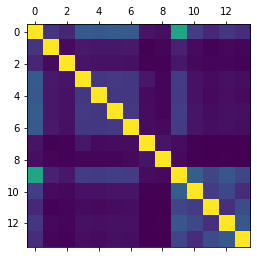

In [67]:
plt.matshow(ptdata[ptlibs].corr(method='spearman'))

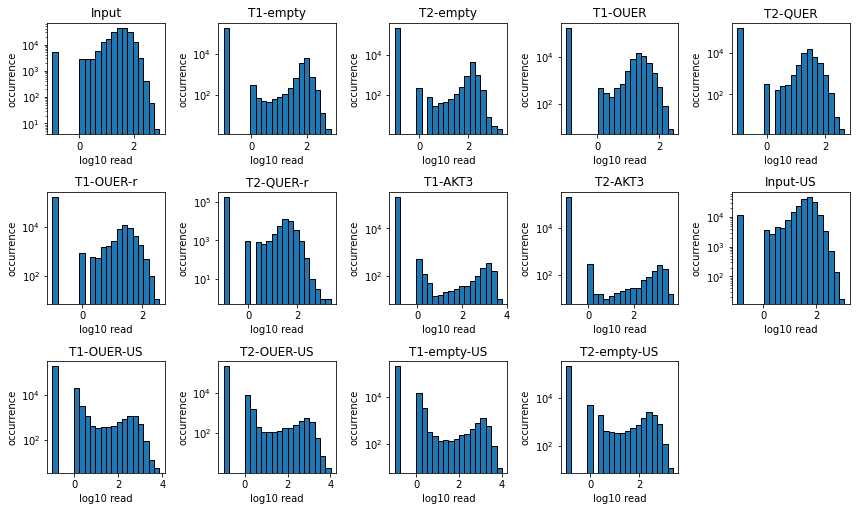

In [81]:
plt.figure(figsize=(12,7.2))
for ploti,lib in enumerate(ptlibs):
    plt.subplot(3,5,ploti+1)
    plt.hist(np.log10(ptdata[lib]+0.1),edgecolor='black',bins=20)
    plt.title(lib)
    plt.yscale('log')
    plt.ylabel('occurrence')
    plt.xlabel('log10 read')
plt.tight_layout()

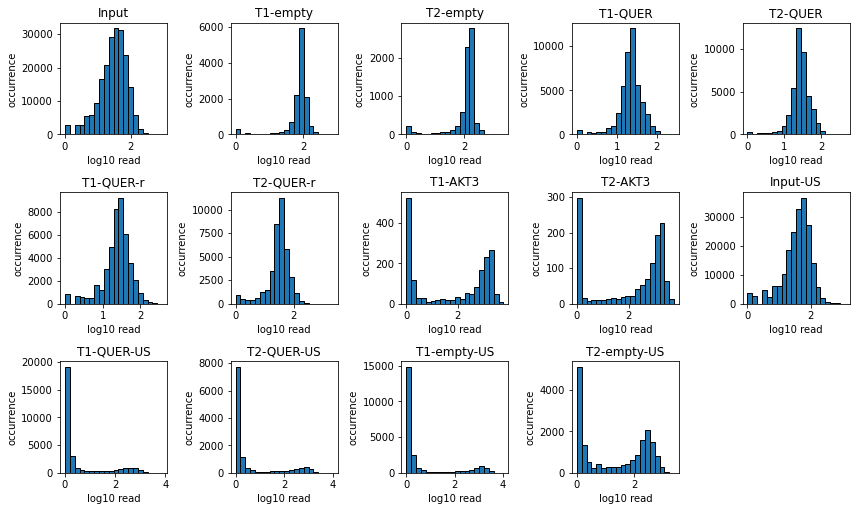

In [69]:
plt.figure(figsize=(12,7.2))
for ploti,lib in enumerate(ptlibs):
    plt.subplot(3,5,ploti+1)
    plt.hist(np.log10(ptdata[lib][ptdata[lib]>0]),edgecolor='black',bins=20)
    plt.title(lib)
    plt.ylabel('occurrence')
    plt.xlabel('log10 read')
plt.tight_layout()

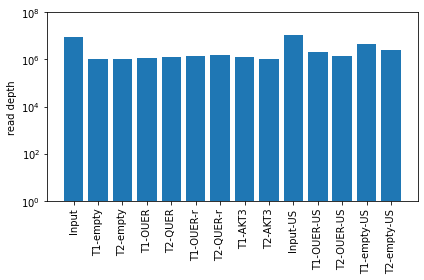

In [74]:
plt.bar(ptlibs,ptdata[ptlibs].sum(axis=0))
plt.ylabel('read depth')
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylim(1,1e8)
plt.tight_layout()

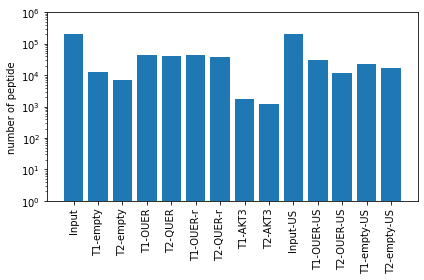

In [75]:
plt.bar(ptlibs,ptdata[ptlibs].astype(bool).sum(axis=0))
plt.ylabel('number of peptide')
plt.xticks(rotation=90)
plt.yscale('log')
plt.ylim(1,1e6)
plt.tight_layout()

In [91]:
ptlibs

['Input',
 'T1-empty',
 'T2-empty',
 'T1-QUER',
 'T2-QUER',
 'T1-QUER-r',
 'T2-QUER-r',
 'T1-AKT3',
 'T2-AKT3',
 'Input-US',
 'T1-QUER-US',
 'T2-QUER-US',
 'T1-empty-US',
 'T2-empty-US']

['T1-QUER', 'T2-QUER', 'T1-QUER-r', 'T2-QUER-r', 'T1-QUER-US', 'T2-QUER-US']


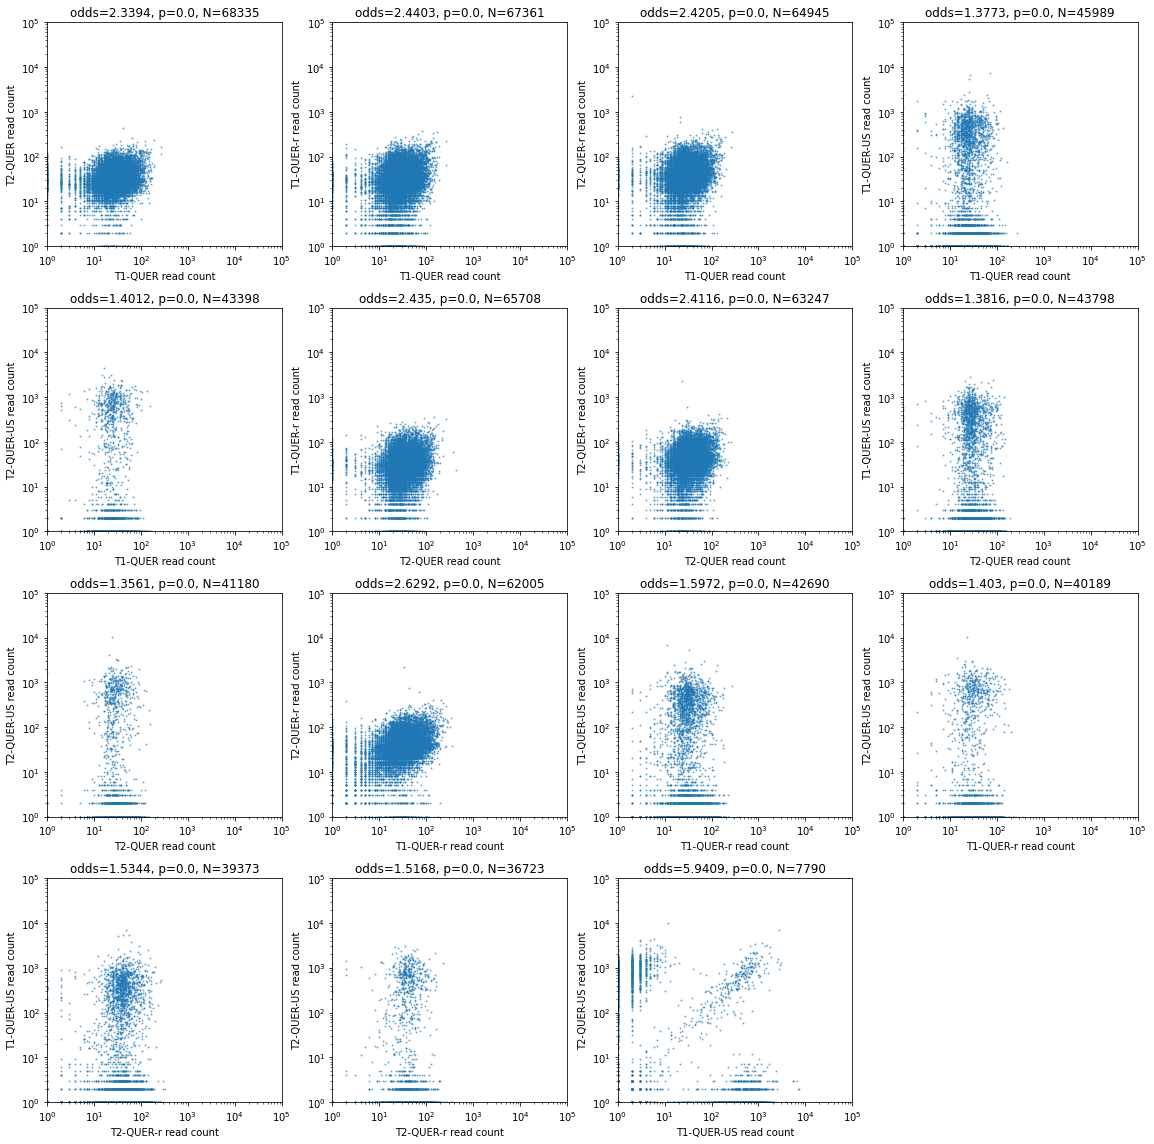

In [92]:
#grouplist = ['Input','QUER','AKT3','empty']
grouplist = ['QUER']
for group in grouplist:
    tlibs = [x for x in ptlibs if group in x]
    print (tlibs)
    Nlib = len(tlibs)
    Nplot = Nlib*(Nlib-1)/2
    plt.figure(figsize=(16,4*math.ceil(Nplot/4)))
    ploti = 0
    for i,lib1 in enumerate(tlibs):
        for j,lib2 in enumerate(tlibs):
            if i>=j: continue
            ploti += 1
            plt.subplot(math.ceil(Nplot/4),4,ploti)
            plt.scatter(ptdata[lib1],ptdata[lib2],s=1,alpha=0.5)
            plt.xlim(1, 100000)
            plt.ylim(1, 100000)
            plt.xlabel(lib1+' read count')
            plt.ylabel(lib2+' read count')
            plt.xscale('log')
            plt.yscale('log')
            if group == 'Input': #spearman correlation test
                tdata = ptdata[(ptdata[lib1]!=0)&(ptdata[lib2]!=0)]
                rho = ss.spearmanr(tdata[lib1],tdata[lib2])[0]
                count = len(tdata)
                plt.title('rho='+str(round(rho,4))+', N='+str(count))
            else: #fisher exact test
                if group == 'empty': 
                    THRE = 10
                else: 
                    THRE = 10
                n1 = len(ptdata[(ptdata[lib1]>THRE)&(ptdata[lib2]>THRE)])
                n2 = len(ptdata[(ptdata[lib1]<=THRE)&(ptdata[lib2]>THRE)])
                n3 = len(ptdata[(ptdata[lib1]>THRE)&(ptdata[lib2]<=THRE)])
                n4 = len(ptdata[(ptdata[lib1]<=THRE)&(ptdata[lib2]<=THRE)])
                odds,p = ss.fisher_exact([[n1,n2],[n3,n4]])
                count = n1+n2+n3
                plt.title('odds='+str(round(odds,4))+', p='+str(round(p,4))+', N='+str(count))
    plt.tight_layout()
    plt.savefig('correlation_scatter_human_'+group+'.png',dpi=300)

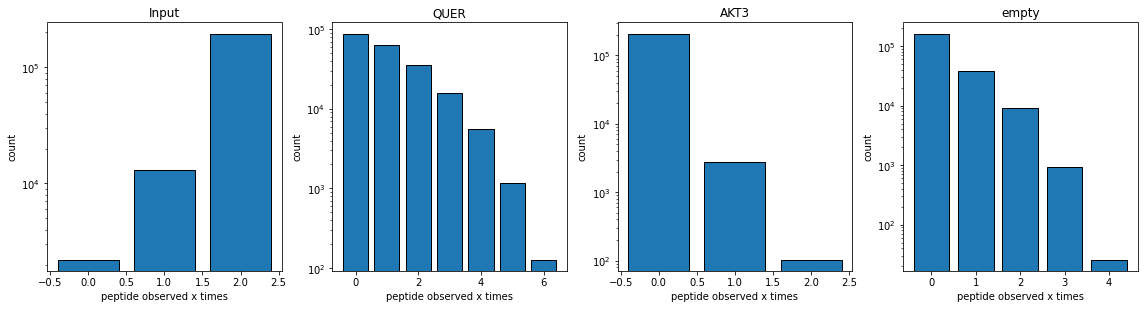

In [94]:
grouplist = ['Input','QUER','AKT3','empty']
plt.figure(figsize=(16,8))
ploti = 0
for group in grouplist:
    ploti += 1
    plt.subplot(2,4,ploti)
    tlibs = [x for x in ptlibs if group in x]
    Nlib = len(tlibs)
    xlist = range(Nlib+1)
    ylist = []
    tdata = ptdata[tlibs]
    pepcount = Counter(np.count_nonzero(tdata, axis=1))
    for occ in xlist:
        ylist.append(pepcount[occ])
    plt.bar(xlist,ylist,edgecolor='black')
    plt.ylabel('count')
    plt.xlabel('peptide observed x times')
    plt.yscale('log')
    plt.title(group)
plt.tight_layout()
plt.savefig('peptide_occurrence_human.png',dpi=300)

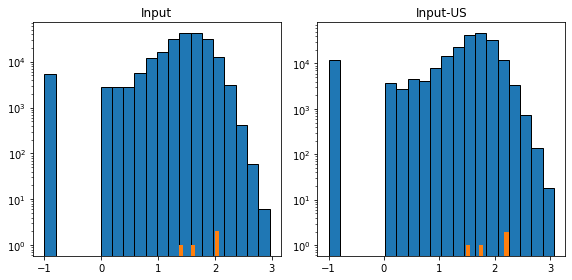

In [75]:
#Stop frequency
group = 'Input'
tlibs = [x for x in ptlibs if group in x]
plt.figure(figsize=(12,4))
for i,tlib in enumerate(tlibs):
    plt.subplot(1,3,i+1)
    stopdata = ptdata[ptdata['Gene'].str.contains('STOP')]
    plt.hist(np.log10(ptdata[tlib]+0.1),bins=20,edgecolor='black')
    plt.hist(np.log10(stopdata[tlib]+0.1))
    plt.yscale('log')
    plt.title(tlib)
plt.tight_layout()

In [77]:
#AKT3 is not good, is it true that AKT3 has the most output molecules based on qPCR?
#QUER seems good.

In [81]:
ptdata[(ptdata['T1-AKT3']>10)&(ptdata['T2-AKT3']>10)].sort_values(by='T1-AKT3',ascending=False)

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,Input-US,T1-QUER-US,T2-QUER-US,T1-empty-US,T2-empty-US
142078,LGI2_HUMAN-91546,126,0,0,25,32,42,88,2119,1607,110,1,0,0,0
9987,CYAC3_HUMAN-101925,108,0,0,0,0,45,0,761,679,37,0,0,0,0
1515,1C01_HUMAN-205775,152,0,0,70,45,41,89,583,11,54,0,4,0,0
21677,MROH9_HUMAN-75333,60,0,0,21,0,28,0,411,378,31,0,0,0,0
146121,RHG17_HUMAN-18876,67,0,0,31,30,0,0,406,216,85,0,0,0,0


In [82]:
peplist = ptdata['Gene']
genelist = sorted(list(set([x.rsplit('_')[0] for x in peplist])))
len(genelist)

20287

-- samples like T1-QUER T2-QUER T1-QUER-r T2-QUER-r looks good. should have useful frequency information.
-- US samples have high occurence of low count peptide. Maybe has higher sequencing error rate or cross-contamination.
-- US samples have good correlation between them.

# Check how to define enrichment : by peptide or by gene

In [95]:
ptdata['Input_freq'] = ptdata['Input']/sum(ptdata['Input'])
ptdata['Input-US_freq'] = ptdata['Input-US']/sum(ptdata['Input-US'])
ptdata['Input_meanfreq'] = (ptdata['Input_freq']+ptdata['Input-US_freq'])/2
group = 'QUER'
tlibs = [x for x in ptlibs if group in x]
for lib in tlibs:
    ptdata[lib+'_enrich'] = (ptdata[lib]/sum(ptdata[lib]))/ptdata['Input_meanfreq']

In [87]:
ptdata

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,...,T2-empty-US,Input_freq,Input-US_freq,Input_meanfreq,T1-QUER_enrich,T2-QUER_enrich,T1-QUER-r_enrich,T2-QUER-r_enrich,T1-QUER-US_enrich,T2-QUER-US_enrich
0,CRBA4_HUMAN-25376,4,0,0,0,0,0,0,0,0,...,0,4.677003e-07,0.000000e+00,2.338501e-07,0.000000,0.0000,0.0,0.000000,0.0,0.0
1,FANK1_HUMAN-41277,43,0,0,38,0,0,0,0,0,...,0,5.027778e-06,2.560523e-06,3.794150e-06,8.296891,0.0000,0.0,0.000000,0.0,0.0
2,FANK1_HUMAN-41276,47,0,0,25,31,0,17,0,0,...,0,5.495478e-06,5.121046e-06,5.308262e-06,3.901521,4.4577,0.0,2.067377,0.0,0.0
3,FANK1_HUMAN-41279,33,0,0,0,0,0,0,0,0,...,0,3.858527e-06,3.793367e-06,3.825947e-06,0.000000,0.0000,0.0,0.000000,0.0,0.0
4,FANK1_HUMAN-41278,38,0,0,0,0,0,0,0,0,...,0,4.443153e-06,1.896684e-07,2.316410e-06,0.000000,0.0000,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210064,MYO6_HUMAN-155579,0,0,0,0,0,0,0,0,0,...,0,0.000000e+00,9.483418e-08,4.741709e-08,0.000000,0.0000,0.0,0.000000,0.0,0.0
210065,ONEC2_HUMAN-78165,0,0,0,0,0,0,0,0,0,...,0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN
210066,DHX34_HUMAN-122374,0,0,0,0,0,0,0,0,0,...,0,0.000000e+00,1.707015e-06,8.535076e-07,0.000000,0.0000,0.0,0.000000,0.0,0.0
210067,UBQL1_HUMAN-108414,0,0,0,0,0,0,0,0,0,...,0,0.000000e+00,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN


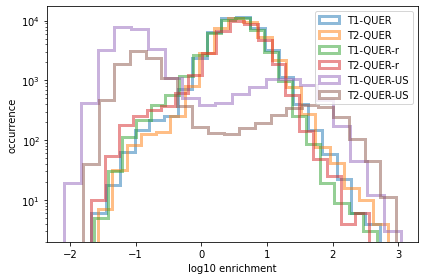

In [98]:
for lib in tlibs:
    tlist = ptdata[lib+'_enrich'][~ptdata[lib+'_enrich'].isin([np.nan, np.inf, -np.inf,0])]
    plt.hist(np.log10(tlist),alpha=0.5,label=lib,bins=20,histtype='step',linewidth=3)
plt.yscale('log')
plt.legend()
plt.xlabel('log10 enrichment')
plt.ylabel('occurrence')
plt.tight_layout()

In [96]:
def mean_enrich(x):
    tlist = x[[i+'_enrich' for i in tlibs]]
    tlist = tlist[~tlist.isin([np.nan,np.inf])]
    tlist = tlist.replace(0,1e-3)
    if len(tlist) == 0:
        return np.nan
    else:
        return ss.gmean(tlist.astype('float64'))

tdata = ptdata[tlibs]
ptdata['QUER_count'] = np.count_nonzero(tdata, axis=1)
ptdata['QUER_meanenrich'] = ptdata.apply(lambda x:mean_enrich(x),axis=1)

In [105]:
ptdata.sort_values(by='QUER_meanenrich',ascending=False)

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,...,Input-US_freq,Input_meanfreq,T1-QUER_enrich,T2-QUER_enrich,T1-QUER-r_enrich,T2-QUER-r_enrich,T1-QUER-US_enrich,T2-QUER-US_enrich,QUER_count,QUER_meanenrich
5522,K2026_HUMAN-18790,55,0,0,32,34,55,146,0,0,...,0.000006,0.000006,4.209443,4.121059,6.326962,14.965950,0.074450,67.241300,6,4.492686
123359,ANT3_HUMAN-119862,42,0,0,37,66,46,31,0,0,...,0.000006,0.000006,5.535175,9.097641,6.017905,3.613833,0.084669,64.144678,6,4.256566
71187,FADS3_HUMAN-192508,48,0,0,17,26,52,93,0,0,...,0.000007,0.000006,2.281455,3.215079,6.102731,9.725742,114.388029,0.118891,6,4.253339
169614,ZN140_HUMAN-88864,60,0,0,63,29,51,58,0,0,...,0.000005,0.000006,8.950138,3.796141,6.336030,6.420870,14.714070,0.251712,6,4.151485
100224,NELFB_HUMAN-185588,39,0,0,66,92,132,104,0,0,...,0.000005,0.000005,11.876934,15.254692,20.772664,14.583793,61.516257,0.000000,5,3.873261
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210056,BTBDB_HUMAN-182163,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
210060,ASPM_HUMAN-136148,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
210065,ONEC2_HUMAN-78165,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
210067,UBQL1_HUMAN-108414,0,0,0,0,0,0,0,0,0,...,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


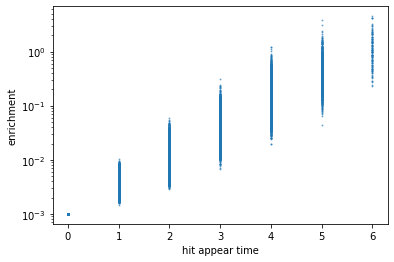

In [108]:
plt.scatter(ptdata['QUER_count'],ptdata['QUER_meanenrich'],s=1,alpha=0.5)
plt.xlabel('hit appear time')
plt.ylabel('enrichment')
plt.yscale('log')

In [110]:
ptdata[ptdata['Gene'].str.contains('K2026')].sort_values('QUER_meanenrich',ascending=False)

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,...,Input-US_freq,Input_meanfreq,T1-QUER_enrich,T2-QUER_enrich,T1-QUER-r_enrich,T2-QUER-r_enrich,T1-QUER-US_enrich,T2-QUER-US_enrich,QUER_count,QUER_meanenrich
5522,K2026_HUMAN-18790,55,0,0,32,34,55,146,0,0,...,6.164222e-06,6.297550e-06,4.209443,4.121059,6.326962,14.965950,0.074450,67.2413,6,4.492686
5518,K2026_HUMAN-18794,24,0,0,31,0,0,43,0,0,...,5.595217e-06,4.200709e-06,6.113436,0.000000,0.000000,6.607983,0.000000,0.0000,2,0.018524
149923,K2026_HUMAN-18815,37,0,0,32,0,0,29,0,0,...,6.353890e-06,5.340059e-06,4.964211,0.000000,0.000000,3.505702,0.000000,0.0000,2,0.016098
149917,K2026_HUMAN-18813,73,88,0,23,29,0,0,0,0,...,3.888201e-06,6.211866e-06,3.067271,3.563506,0.000000,0.000000,0.000000,0.0000,2,0.014897
149919,K2026_HUMAN-18811,88,0,0,0,24,0,45,0,0,...,1.289745e-05,1.159343e-05,0.000000,1.580159,0.000000,2.505669,0.000000,0.0000,2,0.012578
5520,K2026_HUMAN-18796,7,0,0,21,0,0,0,0,0,...,3.034694e-06,1.926585e-06,9.029787,0.000000,0.000000,0.000000,0.000000,0.0000,1,0.004563
149924,K2026_HUMAN-18814,114,0,0,0,0,0,94,0,0,...,4.172704e-06,8.751081e-06,0.000000,0.000000,0.000000,6.934086,0.000000,0.0000,1,0.004367
149922,K2026_HUMAN-18816,46,0,0,34,0,0,0,0,0,...,4.931378e-06,5.154965e-06,5.463859,0.000000,0.000000,0.000000,0.000000,0.0000,1,0.004197
130931,K2026_HUMAN-18804,38,0,0,0,0,24,0,0,0,...,1.991518e-06,3.217335e-06,0.000000,0.000000,5.404047,0.000000,0.000000,0.0000,1,0.004189
130938,K2026_HUMAN-18803,14,0,0,0,0,9,0,0,0,...,1.138010e-06,1.387481e-06,0.000000,0.000000,4.699155,0.000000,0.000000,0.0000,1,0.004093


In [112]:
ptdata[ptdata['Gene'].str.contains('ANT3')].sort_values('QUER_meanenrich',ascending=False)
#ANT3_HUMAN-119858 has 0.4 enrichment. It is not low. But dragging down by some 0s from some replicates.

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,...,Input-US_freq,Input_meanfreq,T1-QUER_enrich,T2-QUER_enrich,T1-QUER-r_enrich,T2-QUER-r_enrich,T1-QUER-US_enrich,T2-QUER-US_enrich,QUER_count,QUER_meanenrich
123359,ANT3_HUMAN-119862,42,0,0,37,66,46,31,0,0,...,0.000006,0.000006,5.535175,9.097641,6.017905,3.613833,0.084669,64.144678,6,4.256566
142457,ANT3_HUMAN-119858,50,0,0,0,45,62,56,0,0,...,0.000009,0.000007,0.000000,4.714707,6.165049,4.961943,71.691019,0.000000,4,0.466750
123358,ANT3_HUMAN-119863,31,0,0,0,19,0,30,0,0,...,0.000011,0.000007,0.000000,2.009301,0.000000,2.683084,0.064957,0.101677,4,0.057357
122909,ANT3_HUMAN-119866,72,0,0,0,58,33,0,0,0,...,0.000009,0.000009,0.000000,5.136508,2.773682,0.000000,0.163192,0.000000,3,0.036397
123361,ANT3_HUMAN-119860,22,0,0,0,0,24,0,0,0,...,0.000003,0.000003,0.000000,0.000000,6.418837,0.000000,0.000000,0.000000,1,0.004311
100000,ANT3_HUMAN-119861,12,0,0,0,0,7,0,0,0,...,0.000001,0.000001,0.000000,0.000000,3.589380,0.000000,0.000000,0.000000,1,0.003913
122910,ANT3_HUMAN-119865,77,0,0,0,0,0,0,0,0,...,0.000013,0.000011,0.000000,0.000000,0.000000,0.000000,0.000000,0.067902,1,0.002020
123365,ANT3_HUMAN-119864,22,0,0,0,0,0,0,0,0,...,0.000007,0.000005,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000
142458,ANT3_HUMAN-119859,41,0,0,0,0,0,0,0,0,...,0.000004,0.000004,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000


In [113]:
ptdata[ptdata['Gene'].str.contains('FADS3')].sort_values('QUER_meanenrich',ascending=False)

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,...,Input-US_freq,Input_meanfreq,T1-QUER_enrich,T2-QUER_enrich,T1-QUER-r_enrich,T2-QUER-r_enrich,T1-QUER-US_enrich,T2-QUER-US_enrich,QUER_count,QUER_meanenrich
71187,FADS3_HUMAN-192508,48,0,0,17,26,52,93,0,0,...,6.733227e-06,6.172815e-06,2.281455,3.215079,6.102731,9.725742,114.388029,0.118891,6,4.253339
107087,FADS3_HUMAN-192504,40,0,0,0,0,37,54,0,0,...,9.483418e-07,2.812672e-06,0.000000,0.000000,9.529865,12.393606,0.000000,0.000000,2,0.022150
134135,FADS3_HUMAN-192511,20,0,0,0,0,34,0,0,0,...,2.560523e-06,2.449512e-06,0.000000,0.000000,10.055496,0.000000,0.382815,0.000000,2,0.012519
71186,FADS3_HUMAN-192509,54,0,0,19,0,0,0,0,0,...,1.820816e-05,1.226106e-05,1.283725,0.000000,0.000000,0.000000,0.038239,0.000000,2,0.006051
71181,FADS3_HUMAN-192506,38,0,0,0,0,0,0,0,0,...,5.784885e-06,5.114019e-06,0.000000,0.000000,0.000000,0.000000,41.622906,0.000000,1,0.005887
19774,FADS3_HUMAN-192507,7,0,0,0,0,0,0,0,0,...,8.535076e-07,8.359916e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000
49530,FADS3_HUMAN-192510,12,0,0,0,0,0,0,0,0,...,5.595217e-06,3.499159e-06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000
107082,FADS3_HUMAN-192505,2,0,0,0,0,0,0,0,0,...,8.535076e-07,5.436789e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000


In [114]:
#maybe focus on genes have more than 1 peptide has enrichment

In [116]:
def mean_enrich(x):
    tlist = x[[i+'_enrich' for i in tlibs]]
    tlist = tlist[~tlist.isin([np.nan,np.inf,0])]
    if len(tlist) == 0:
        return np.nan
    else:
        return ss.gmean(tlist.astype('float64'))

tdata = ptdata[tlibs]
ptdata['QUER_meanenrich_exclude0'] = ptdata.apply(lambda x:mean_enrich(x),axis=1)

In [117]:
ptdata.sort_values(by='QUER_meanenrich_exclude0',ascending=False)

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,...,Input_meanfreq,T1-QUER_enrich,T2-QUER_enrich,T1-QUER-r_enrich,T2-QUER-r_enrich,T1-QUER-US_enrich,T2-QUER-US_enrich,QUER_count,QUER_meanenrich,QUER_meanenrich_exclude0
77058,INHBE_HUMAN-171596,2,0,0,0,0,0,0,0,0,...,1.169251e-07,0.000000,0.000000,0.0,0.0,1090.687029,0.0,1,0.010146,1090.687029
14561,TTC3_HUMAN-110558,4,0,0,0,0,0,0,0,0,...,8.028552e-07,0.000000,0.000000,0.0,0.0,701.949870,0.0,1,0.009427,701.949870
101840,DYH11_HUMAN-58367,1,0,0,0,53,0,0,0,0,...,5.846253e-08,0.000000,691.989903,0.0,0.0,0.000000,0.0,1,0.009405,691.989903
152230,FBX28_HUMAN-8117,1,0,0,37,0,0,0,0,0,...,5.846253e-08,524.288592,0.000000,0.0,0.0,0.000000,0.0,1,0.008980,524.288592
136479,ZN428_HUMAN-164369,2,0,0,0,0,0,0,0,0,...,1.169251e-07,0.000000,0.000000,0.0,0.0,521.284242,0.0,1,0.008971,521.284242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210064,MYO6_HUMAN-155579,0,0,0,0,0,0,0,0,0,...,4.741709e-08,0.000000,0.000000,0.0,0.0,0.000000,0.0,0,0.001000,NaN
210065,ONEC2_HUMAN-78165,0,0,0,0,0,0,0,0,0,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN
210066,DHX34_HUMAN-122374,0,0,0,0,0,0,0,0,0,...,8.535076e-07,0.000000,0.000000,0.0,0.0,0.000000,0.0,0,0.001000,NaN
210067,UBQL1_HUMAN-108414,0,0,0,0,0,0,0,0,0,...,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN


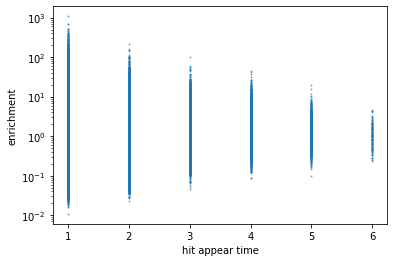

In [118]:
plt.scatter(ptdata['QUER_count'],ptdata['QUER_meanenrich_exclude0'],s=1,alpha=0.5)
plt.xlabel('hit appear time')
plt.ylabel('enrichment')
plt.yscale('log')

In [119]:
ptdata['Gene Name'] = ptdata['Gene'].apply(lambda x:x.rsplit('_')[0])
geneenrich = ptdata[ptdata['QUER_meanenrich']>1].groupby('Gene Name')['QUER_meanenrich'].count()

In [121]:
geneenrich.sort_values(ascending=False)

Gene Name
TITIN    2
HS3S6    2
LRRT3    2
1B56     1
S36A2    1
        ..
GBRB1    1
FRK      1
FMNL2    1
FCGBP    1
ZN823    1
Name: QUER_meanenrich, Length: 141, dtype: int64

In [122]:
ptdata[ptdata['Gene'].str.contains('TITIN')].sort_values('QUER_meanenrich',ascending=False)

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,...,T1-QUER_enrich,T2-QUER_enrich,T1-QUER-r_enrich,T2-QUER-r_enrich,T1-QUER-US_enrich,T2-QUER-US_enrich,QUER_count,QUER_meanenrich,QUER_meanenrich_exclude0,Gene Name
160778,TITIN_HUMAN-115458,88,0,0,63,157,143,37,0,0,...,4.969130,11.410237,9.863560,2.274146,0.044641,8.105567,6,2.778586,2.778586,TITIN
161671,TITIN_HUMAN-114899,93,136,0,83,58,32,0,0,0,...,7.938481,5.111431,2.676500,0.000000,75.567892,0.169463,5,1.056517,4.252574,TITIN
200235,TITIN_HUMAN-115159,115,0,140,87,56,100,29,0,0,...,7.966706,4.725010,8.007877,2.069352,0.570092,0.000000,5,0.841711,3.237394,TITIN
71341,TITIN_HUMAN-115204,78,0,0,22,30,43,77,0,0,...,2.181742,2.741304,3.729126,5.950428,0.056127,0.000000,5,0.441925,1.494231,TITIN
74440,TITIN_HUMAN-115119,50,0,0,21,22,20,38,0,0,...,4.664960,4.503047,3.885228,6.577926,0.000000,0.000000,4,0.285087,4.813544,TITIN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105929,TITIN_HUMAN-115297,42,99,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000,NaN,TITIN
105927,TITIN_HUMAN-115299,31,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000,NaN,TITIN
104995,TITIN_HUMAN-115031,16,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000,NaN,TITIN
103447,TITIN_HUMAN-115408,30,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000,NaN,TITIN


In [123]:
ptdata[ptdata['Gene'].str.contains('HS3S6')].sort_values('QUER_meanenrich',ascending=False)

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,...,T1-QUER_enrich,T2-QUER_enrich,T1-QUER-r_enrich,T2-QUER-r_enrich,T1-QUER-US_enrich,T2-QUER-US_enrich,QUER_count,QUER_meanenrich,QUER_meanenrich_exclude0,Gene Name
198606,HS3S6_HUMAN-62146,39,0,0,45,102,134,103,0,0,...,9.027798,18.854920,23.508882,16.102129,0.113543,0.0,5,1.393308,5.927298,HS3S6
198607,HS3S6_HUMAN-62147,34,0,0,111,55,45,112,0,0,...,19.408046,8.860877,6.880646,15.259967,0.395832,0.0,5,1.387902,5.899708,HS3S6
198605,HS3S6_HUMAN-62145,75,0,0,0,0,111,112,0,0,...,0.000000,0.000000,8.057507,7.244603,19.731572,0.0,3,0.102383,10.482358,HS3S6
198604,HS3S6_HUMAN-62144,138,0,0,0,29,61,0,0,0,...,0.000000,1.603444,3.201019,0.000000,0.000000,0.0,2,0.013134,2.265536,HS3S6
198610,HS3S6_HUMAN-62143,46,0,0,0,0,37,0,0,0,...,0.000000,0.000000,3.852968,0.000000,0.000000,0.0,1,0.003959,3.852968,HS3S6
198609,HS3S6_HUMAN-62142,25,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,0.001000,NaN,HS3S6
198608,HS3S6_HUMAN-62141,0,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,HS3S6


In [124]:
ptdata[ptdata['Gene'].str.contains('LRRT3')].sort_values('QUER_meanenrich',ascending=False)

,Gene,Input,T1-empty,T2-empty,T1-QUER,T2-QUER,T1-QUER-r,T2-QUER-r,T1-AKT3,T2-AKT3,...,T1-QUER_enrich,T2-QUER_enrich,T1-QUER-r_enrich,T2-QUER-r_enrich,T1-QUER-US_enrich,T2-QUER-US_enrich,QUER_count,QUER_meanenrich,QUER_meanenrich_exclude0,Gene Name
180536,LRRT3_HUMAN-130617,90,0,0,18,53,108,134,0,0,...,1.156302,3.137110,6.067088,6.707802,17.705990,0.056909,6,2.301854,2.301854,LRRT3
180537,LRRT3_HUMAN-130616,37,72,0,30,29,21,59,0,0,...,5.107466,4.549225,3.126521,7.827318,35.458845,0.000000,5,1.649771,7.259528,LRRT3
161497,LRRT3_HUMAN-130624,74,0,0,22,25,0,0,0,0,...,2.132497,2.232857,0.000000,0.000000,0.000000,0.000000,2,0.012971,2.182100,LRRT3
180534,LRRT3_HUMAN-130615,18,0,0,36,0,0,0,0,0,...,11.605692,0.000000,0.000000,0.000000,0.000000,0.000000,1,0.004758,11.605692,LRRT3
180535,LRRT3_HUMAN-130614,18,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.138889,0.000000,1,0.002276,0.138889,LRRT3
161498,LRRT3_HUMAN-130620,29,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000,NaN,LRRT3
161499,LRRT3_HUMAN-130621,36,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000,NaN,LRRT3
161500,LRRT3_HUMAN-130623,112,92,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000,NaN,LRRT3
180531,LRRT3_HUMAN-130619,14,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000,NaN,LRRT3
180532,LRRT3_HUMAN-130618,4,0,0,0,0,0,0,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0.001000,NaN,LRRT3


In [128]:
geneenrich = ptdata[ptdata['QUER_count']>4].groupby('Gene Name')['QUER_meanenrich'].count()
geneenrich.sort_values(ascending=False)

Gene Name
RELN         5
TITIN        5
TDR15        4
DYH6         3
DEN2D        3
            ..
HERC1        1
HERC4        1
HHAT         1
HHLA2        1
mCherry-1    1
Name: QUER_meanenrich, Length: 1180, dtype: int64

In [125]:
#I feel eventually QUER_count is a better metrics than QUER_meanenrich.
#need to take the number of peptide in a gene into consideration as well.